In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './genital_tubercle_figures_humans/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.8.0
asciitree           NA
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
cloudpickle         2.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2022.02.1
dateutil            2.8.2
decorator           4.4.2
defusedxml          0.7.1
fasteners           0.17.3
fsspec              2022.02.0
google              NA
h5py                3.8.0
igraph              0.10.8
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.10.1
llvmlite            0.35.0
louvain             0.7.1
markupsafe          2.1.2
matplotlib          3.6.3
mpl_toolkits        NA
msgpack             1.0.3
natsort             8.2.0
numba               0.52.0
numcodecs           0.9.1
numexpr            

'/opt/conda/envs/atac_env/bin/python'

# 1. Load human data

In [2]:
path_to_data = '/nfs/team292/vl6/FetalReproductiveTract/'

In [3]:
human = sc.read(path_to_data + "human_genital_tubercle_mpw_orthologs_with_embedding.h5ad")
human

AnnData object with n_obs × n_vars = 51304 × 2556
    obs: 'n_counts', 'n_genes', 'sample', 'percent_mito', 'percent_ribo', 'doublet_scores', 'barcode', 'souporcell_classification', 'souporcell_assignment', 'leiden', 'leiden_R', 'leiden_2', 'broad_annotations', 'donor', 'stage_pcw', 'stage_cs', 'sex', 'location', 'multiplexing', 'notes', 'library', 'leiden_3', 'HTO2', 'HTO3', 'HTO4', 'total_hto_counts', 'fraction_HTO2', 'fraction_HTO3', 'fraction_HTO4', 'HTO3_HTO4_ratio', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'hashsolo_assignment', 'hash+lib', 'sample+donor', 'batch', 'celltype', 'phase', 'genitaltubercle_celltype', 'human_celltype', 'species'
    var: 'GeneID-0', 'GeneName-0', 'n_cells-0', 'GeneID-1', 'GeneName-1', 'n_cells-1', 'GeneID-10', 'GeneName-10', 'n_cells-10', 'GeneID-100', 'GeneName-100', 'n_cells-100', 'GeneID-101', 'GeneName-101', 'n_cells-101', '

In [4]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False,)

# 2. Import human neighbourhood assignment

In [5]:
human_nhoods = pd.read_csv(path_to_data + 'human_genital_tubercle_mpw_milo_15knn.csv', index_col = 0)
human_nhoods.shape

(51304, 2314)

In [6]:
human_nhoods.head()

31552  24608  10072  19030  45756  2747  \
HD_F_GON14449733_TGTATTCTCGCTGATA      0      0      0      0      0     0   
HD_F_GON14449733_TATCAGGAGATGTAAC      0      0      0      0      0     0   
HD_F_GON14449733_GACTACATCGCCTGAG      0      0      0      0      0     0   
HD_F_GON14449733_CCTTTCTTCGTATCAG      0      0      0      0      0     0   
HD_F_GON14449733_ACCCACTGTAGCAAAT      0      0      0      0      0     0   

                                   39314  40349  12807  46185  ...  25569  \
HD_F_GON14449733_TGTATTCTCGCTGATA      0      0      0      0  ...      0   
HD_F_GON14449733_TATCAGGAGATGTAAC      0      0      0      0  ...      0   
HD_F_GON14449733_GACTACATCGCCTGAG      0      0      0      0  ...      0   
HD_F_GON14449733_CCTTTCTTCGTATCAG      0      0      0      0  ...      0   
HD_F_GON14449733_ACCCACTGTAGCAAAT      0      0      0      0  ...      0   

                                   46700  48414  17864  9375  640  29016  \
HD_F_GON14449733_TGTATTCTCGCTGATA      0      0      0     0    0      0   
HD_F_GON14449733_TATCAGGAGATGTAAC      0      0      0     0    0      0   
HD_F_GON14449733_GACTACATCGCCTGAG      0      0      0     0    0      0   
HD_F_GON14449733_CCTTTCTTCGTATCAG      0      0      0     0    0      0   
HD_F_GON14449733_ACCCACTGTAGCAAAT      0      0      0     0    0      0   

                                   15558  36149  22376  
HD_F_GON14449733_TGTATTCTCGCTGATA      0      0      0  
HD_F_GON14449733_TATCAGGAGATGTAAC      0      0      0  
HD_F_GON14449733_GACTACATCGCCTGAG      0      0      0  
HD_F_GON14449733_CCTTTCTTCGTATCAG      0      0      0  
HD_F_GON14449733_ACCCACTGTAGCAAAT      0      0      0  

[5 rows x 2314 columns]

In [7]:
human_nhoods['celltype'] = human_nhoods.index.map(human.obs['human_celltype'].to_dict())

In [8]:
human_nhoods['celltype'].value_counts()

Corpus Cavernosum (early)    8388
Glans                        7325
Corpus Cavernosum (late)     6817
Prepuce                      5449
Corpus Spongiosum (late)     5127
Subdermal Prepuce            3940
Corpus Spongiosum (early)    3640
Urethral Umbrella Epi        3309
Preputial Lamina Epi         3172
Genital Surface Epi          2080
Urethral Basal Epi           2057
Name: celltype, dtype: int64

In [9]:
# Melt the DataFrame to long format
human_nhoods_long = pd.melt(human_nhoods, id_vars=['celltype'], var_name='neighborhood', value_name='membership')

# Filter for rows where the cell belongs to the neighborhood
human_nhoods_long = human_nhoods_long[human_nhoods_long['membership'] == 1]

# Group by Neighborhood and cell type, then count the occurrences
human_cell_counts = human_nhoods_long.groupby(['neighborhood', 'celltype']).size().reset_index(name='count')

# Determine the most abundant cell type for each neighborhood
human_most_abundant_celltype = human_cell_counts.loc[human_cell_counts.groupby('neighborhood')['count'].idxmax()]

human_most_abundant_celltype = human_most_abundant_celltype[['neighborhood', 'celltype']]

human_most_abundant_celltype.set_index('neighborhood', inplace=True)

In [10]:
human_most_abundant_celltype.shape

(2314, 1)

In [11]:
human_most_abundant_celltype.head()

celltype
neighborhood                           
10023         Corpus Cavernosum (early)
10028          Corpus Spongiosum (late)
10041                           Prepuce
10046          Corpus Spongiosum (late)
10052         Corpus Cavernosum (early)

# 3. Import mouse data 

In [12]:
mouse = sc.read(path_to_data + 'mouse_genital_tubercle_mpw_orthologs_with_embedding.h5ad')
mouse

AnnData object with n_obs × n_vars = 60832 × 2556
    obs: 'n_genes', 'sample', 'donor', 'age', 'sex', 'genotype', 'percent_mito', 'n_counts', 'batch', 'celltype', 'S_score', 'G2M_score', 'phase', 'leiden', 'harmonised_celltype', 'leiden_R', 'mouse_celltype', 'species'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'donor_colors', 'har

# 4. Import mouse neighbourhood assignment

In [13]:
nhoods_mouse = pd.read_csv(path_to_data + "mouse_genital_tubercle_mpw_milo_15knn.csv", index_col = 0)
nhoods_mouse.shape

(60832, 2807)

In [14]:
nhoods_mouse.head()

30942  33368  32251  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG      0      0      0   

                                                    39552  2159  58182  2994  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG      0     0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT      0     0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC      0     0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG      0     0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG      0     0      0     0   

                                                    42058  50927  7969  ...  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG      0      0     0  ...   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT      0      0     0  ...   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC      0      0     0  ...   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG      0      0     0  ...   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG      0      0     0  ...   

                                                    7130  57929  12772  19038  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG     0      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT     0      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC     0      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG     0      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG     0      0      0      0   

                                                    5247  58241  52388  9332  \
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG     0      0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT     0      0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC     0      0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG     0      0      0     0   
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG     0      0      0     0   

                                                    41698  35950  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG      0      0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT      0      0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC      0      0  
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG      0      0  
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG      0      0  

[5 rows x 2807 columns]

In [15]:
nhoods_mouse['celltype'] = nhoods_mouse.index.map(mouse.obs['mouse_celltype'].to_dict())

In [16]:
# Melt the DataFrame to long format
nhoods_mouse_long = pd.melt(nhoods_mouse, id_vars=['celltype'], var_name='neighborhood', value_name='membership')

# Filter for rows where the cell belongs to the neighborhood
nhoods_mouse_long = nhoods_mouse_long[nhoods_mouse_long['membership'] == 1]

# Group by Neighborhood and CellType, then count the occurrences
cell_counts_mouse = nhoods_mouse_long.groupby(['neighborhood', 'celltype']).size().reset_index(name='count')

# Determine the most abundant cell type for each neighborhood
most_abundant_celltype_mouse = cell_counts_mouse.loc[cell_counts_mouse.groupby('neighborhood')['count'].idxmax()]

# Drop unnecessary columns if you want, and rename as needed
most_abundant_celltype_mouse = most_abundant_celltype_mouse[['neighborhood', 'celltype']]

# Optionally, you might want to set the Neighborhood as the index
most_abundant_celltype_mouse.set_index('neighborhood', inplace=True)

In [17]:
most_abundant_celltype_mouse.shape

(2807, 1)

In [18]:
most_abundant_celltype_mouse.head()

celltype
neighborhood                                    
10031         Early Proximal Glanular Mesenchyme
10067                Ventral Glanular Mesenchyme
10068          Distal Dorsal Glanular Mesenchyme
10075                       Preputial Mesenchyme
10079          Late Proximal Glanular Mesenchyme

# 5. Import neighbourhood matching

In [19]:
nhood_match = pd.read_csv('/nfs/team292/vl6/Mouse_RepTract/Amato2021/wbgm__spearman__FDR0_05__5scrambles__mouse_genital_tubercle_mpw_milo_15knn__human_genital_tubercle_mpw_milo_15knn.csv')
nhood_match.shape

(1630, 2)

In [20]:
nhood_match.head()

mouse_genital_tubercle_mpw_milo_15knn  \
0                                  10031   
1                                  10067   
2                                  10068   
3                                  10075   
4                                  10079   

   human_genital_tubercle_mpw_milo_15knn  
0                                  27449  
1                                   7254  
2                                    966  
3                                   9339  
4                                  19868

In [21]:
nhood_match['mouse_celltype'] = nhood_match['mouse_genital_tubercle_mpw_milo_15knn'].astype(str).map(most_abundant_celltype_mouse['celltype'].to_dict())
nhood_match['human_celltype'] = nhood_match['human_genital_tubercle_mpw_milo_15knn'].astype(str).map(human_most_abundant_celltype['celltype'].to_dict())

In [22]:
nhood_match.head()

mouse_genital_tubercle_mpw_milo_15knn  \
0                                  10031   
1                                  10067   
2                                  10068   
3                                  10075   
4                                  10079   

   human_genital_tubercle_mpw_milo_15knn                      mouse_celltype  \
0                                  27449  Early Proximal Glanular Mesenchyme   
1                                   7254         Ventral Glanular Mesenchyme   
2                                    966   Distal Dorsal Glanular Mesenchyme   
3                                   9339                Preputial Mesenchyme   
4                                  19868   Late Proximal Glanular Mesenchyme   

             human_celltype  
0  Corpus Spongiosum (late)  
1                     Glans  
2                     Glans  
3                   Prepuce  
4                   Prepuce

In [23]:
import pandas as pd
import plotly.graph_objects as go

In [24]:
from plotly.offline import iplot, init_notebook_mode

# Enable Plotly offline mode to display plots in the notebook
init_notebook_mode(connected=True)

In [25]:

# Create a list of unique labels (cell types) from both annotations
labels = pd.concat([nhood_match['mouse_celltype'], nhood_match['human_celltype']]).unique()

# Map labels to integers for source/target in Sankey
label_to_id = {label: idx for idx, label in enumerate(labels)}

# Create source, target, and value lists for Sankey diagram
sources = nhood_match['mouse_celltype'].map(label_to_id).tolist()
targets = nhood_match['human_celltype'].map(label_to_id).tolist()
values = [1] * len(nhood_match)  # Assuming each row (comparison) contributes a count of 1

# Build the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=30,  # Padding between nodes
        thickness=20,
        line=dict(color="black", width=1),
        label=list(labels),
    ),
    link=dict(
        source=sources,  # indices of source nodes
        target=targets,  # indices of target nodes
        value=values,  # magnitude of flow between nodes
        line=dict(color="lightgrey", width=0.5)
    )
)])

fig.update_layout(title_text="Comparison of Cell Type Annotations", font_size=15,
                 width=800, height=600 )
fig.show()


In [26]:
import kaleido

In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.io import write_image

labels = pd.concat([nhood_match['mouse_celltype'], nhood_match['human_celltype']]).unique()
label_to_id = {label: idx for idx, label in enumerate(labels)}

# Create source, target, and value lists for Sankey diagram
sources = nhood_match['mouse_celltype'].map(label_to_id).tolist()
targets = nhood_match['human_celltype'].map(label_to_id).tolist()
values = [1] * len(nhood_match)  # Assuming each row (comparison) contributes a count of 1

# Define colors for the nodes
color_map = {
    'Epithelium' : 'burlywood', 'Distal Dorsal Glanular Mesenchyme' : 'navy', 
    'Ventral Glanular Mesenchyme' : 'blue', 
    'Early Proximal Glanular Mesenchyme' : 'deepskyblue', 'Late Proximal Glanular Mesenchyme' : 'dodgerblue', 
    'Sub-Dermal Prepuce' : 'blueviolet', 'Preputial Mesenchyme' : 'violet', 'Corpus Cavernsoum' : 'green', 
    'Urethral Basal Epi' : 'maroon',  'Urethral Umbrella Epi' : 'darkorange',
    'Genital Surface Epi' : 'goldenrod', 'Preputial Lamina Epi' : 'gold',
     'Glans' : 'navy', 'Corpus Spongiosum (early)' : 'deepskyblue', 'Corpus Spongiosum (late)' : 'dodgerblue',
   
    'Corpus Cavernosum (early)' : 'forestgreen', 'Corpus Cavernosum (late)' : 'yellowgreen',
     'Prepuce' : 'violet', 'Subdermal Prepuce' : 'blueviolet'
}

# Use the color map to assign colors to each label
node_colors = [color_map.get(label, '#cccccc') for label in labels]  # Default color if not specified

# Build the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=30,  # Padding between nodes
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(labels),
        color=node_colors  # Apply color to nodes
    ),
    link=dict(
        source=sources,  # indices of source nodes
        target=targets,  # indices of target nodes
        value=values,  # magnitude of flow between nodes
        color='gainsboro'  # Color of the links
    )
)])

fig.update_layout(font_size=15, width=800, height=600)

# Save the figure as a PDF
fig.write_image("sankey_diagram.pdf")


In [28]:
nhood_match.tail()

mouse_genital_tubercle_mpw_milo_15knn  \
1625                                   9889   
1626                                   9890   
1627                                   9927   
1628                                   9979   
1629                                   9985   

      human_genital_tubercle_mpw_milo_15knn  \
1625                                  27457   
1626                                   6644   
1627                                  50672   
1628                                   9375   
1629                                  16645   

                          mouse_celltype             human_celltype  
1625         Ventral Glanular Mesenchyme  Corpus Cavernosum (early)  
1626                  Sub-Dermal Prepuce          Subdermal Prepuce  
1627         Ventral Glanular Mesenchyme                      Glans  
1628   Late Proximal Glanular Mesenchyme  Corpus Cavernosum (early)  
1629  Early Proximal Glanular Mesenchyme  Corpus Cavernosum (early)

In [29]:
nhood_match['nhood_matched'] = range(1, len(nhood_match) + 1)

In [30]:
nhood_match['nhood_matched'] = ['nhood_' + str(i) for i in nhood_match['nhood_matched']]

In [31]:
nhood_match.head()

mouse_genital_tubercle_mpw_milo_15knn  \
0                                  10031   
1                                  10067   
2                                  10068   
3                                  10075   
4                                  10079   

   human_genital_tubercle_mpw_milo_15knn                      mouse_celltype  \
0                                  27449  Early Proximal Glanular Mesenchyme   
1                                   7254         Ventral Glanular Mesenchyme   
2                                    966   Distal Dorsal Glanular Mesenchyme   
3                                   9339                Preputial Mesenchyme   
4                                  19868   Late Proximal Glanular Mesenchyme   

             human_celltype nhood_matched  
0  Corpus Spongiosum (late)       nhood_1  
1                     Glans       nhood_2  
2                     Glans       nhood_3  
3                   Prepuce       nhood_4  
4                   Prepuce       nhood_5

In [32]:
nhood_match['combined_celltype'] = nhood_match['mouse_celltype'] + ' --- ' + nhood_match['human_celltype']

In [33]:
nhood_match.head()

mouse_genital_tubercle_mpw_milo_15knn  \
0                                  10031   
1                                  10067   
2                                  10068   
3                                  10075   
4                                  10079   

   human_genital_tubercle_mpw_milo_15knn                      mouse_celltype  \
0                                  27449  Early Proximal Glanular Mesenchyme   
1                                   7254         Ventral Glanular Mesenchyme   
2                                    966   Distal Dorsal Glanular Mesenchyme   
3                                   9339                Preputial Mesenchyme   
4                                  19868   Late Proximal Glanular Mesenchyme   

             human_celltype nhood_matched  \
0  Corpus Spongiosum (late)       nhood_1   
1                     Glans       nhood_2   
2                     Glans       nhood_3   
3                   Prepuce       nhood_4   
4                   Prepuce       nhood_5   

                                   combined_celltype  
0  Early Proximal Glanular Mesenchyme --- Corpus ...  
1              Ventral Glanular Mesenchyme --- Glans  
2        Distal Dorsal Glanular Mesenchyme --- Glans  
3                   Preputial Mesenchyme --- Prepuce  
4      Late Proximal Glanular Mesenchyme --- Prepuce

In [34]:
nhood_match['combined_celltype'].value_counts()

Corpus Cavernsoum --- Corpus Cavernosum (late)                      158
Late Proximal Glanular Mesenchyme --- Prepuce                       141
Distal Dorsal Glanular Mesenchyme --- Glans                         136
Preputial Mesenchyme --- Subdermal Prepuce                          124
Ventral Glanular Mesenchyme --- Corpus Cavernosum (early)            97
Corpus Cavernsoum --- Corpus Cavernosum (early)                      97
Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)      88
Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (early)     71
Late Proximal Glanular Mesenchyme --- Glans                          70
Late Proximal Glanular Mesenchyme --- Corpus Cavernosum (early)      70
Preputial Mesenchyme --- Corpus Spongiosum (late)                    68
Sub-Dermal Prepuce --- Subdermal Prepuce                             66
Ventral Glanular Mesenchyme --- Glans                                65
Preputial Mesenchyme --- Corpus Spongiosum (early)              

In [35]:
nhood_match = nhood_match[nhood_match['combined_celltype'] == 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)']
nhood_match

mouse_genital_tubercle_mpw_milo_15knn  \
0                                     10031   
12                                    10315   
28                                     1087   
44                                    11370   
49                                    11730   
...                                     ...   
1575                                   8121   
1585                                   8329   
1598                                   8769   
1611                                   9254   
1618                                   9566   

      human_genital_tubercle_mpw_milo_15knn  \
0                                     27449   
12                                     2150   
28                                    38306   
44                                    10391   
49                                    18734   
...                                     ...   
1575                                  27247   
1585                                  27453   
1598                                  27755   
1611                                  16081   
1618                                  17401   

                          mouse_celltype            human_celltype  \
0     Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
12    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
28    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
44    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
49    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
...                                  ...                       ...   
1575  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1585  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1598  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1611  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1618  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   

     nhood_matched                                  combined_celltype  
0          nhood_1  Early Proximal Glanular Mesenchyme --- Corpus ...  
12        nhood_13  Early Proximal Glanular Mesenchyme --- Corpus ...  
28        nhood_29  Early Proximal Glanular Mesenchyme --- Corpus ...  
44        nhood_45  Early Proximal Glanular Mesenchyme --- Corpus ...  
49        nhood_50  Early Proximal Glanular Mesenchyme --- Corpus ...  
...            ...                                                ...  
1575    nhood_1576  Early Proximal Glanular Mesenchyme --- Corpus ...  
1585    nhood_1586  Early Proximal Glanular Mesenchyme --- Corpus ...  
1598    nhood_1599  Early Proximal Glanular Mesenchyme --- Corpus ...  
1611    nhood_1612  Early Proximal Glanular Mesenchyme --- Corpus ...  
1618    nhood_1619  Early Proximal Glanular Mesenchyme --- Corpus ...  

[88 rows x 6 columns]

In [36]:
mouse_nhood_match = nhood_match['mouse_genital_tubercle_mpw_milo_15knn'].to_list()

In [37]:
len(mouse_nhood_match)

88

In [38]:
len(np.unique(mouse_nhood_match))

88

In [39]:
mouse_nhood_match = list(np.unique(mouse_nhood_match))

In [40]:
mouse_nhood_match_str = [str(i) for i in mouse_nhood_match]

In [41]:
nhoods_mouse_filtered = nhoods_mouse[mouse_nhood_match_str]

In [42]:
nhoods_mouse_filtered = nhoods_mouse_filtered[nhoods_mouse_filtered.any(axis=1)]

In [43]:
nhoods_mouse_filtered

254  1087  1445  2453  \
GSM5324563_E14.5_male_genitalia_1_AAACGAACAGCTTCCT    0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AAAGAACGTTGCTCAA    1     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AAAGGGCGTGAATTGA    0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AACGTCATCCGTTTCG    0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AAGCGTTGTCGCACAC    0     0     0     0   
...                                                 ...   ...   ...   ...   
GSM5324574_E18.5_female_genitalia_2_TTTCACATCCA...    0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTCATGGTCC...    0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTCGATAGCA...    0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTGACTTCTT...    0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...    0     0     0     0   

                                                    5445  6671  7001  7211  \
GSM5324563_E14.5_male_genitalia_1_AAACGAACAGCTTCCT     0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AAAGAACGTTGCTCAA     0     0     1     0   
GSM5324563_E14.5_male_genitalia_1_AAAGGGCGTGAATTGA     0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AACGTCATCCGTTTCG     0     0     0     0   
GSM5324563_E14.5_male_genitalia_1_AAGCGTTGTCGCACAC     0     0     0     0   
...                                                  ...   ...   ...   ...   
GSM5324574_E18.5_female_genitalia_2_TTTCACATCCA...     0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTCATGGTCC...     0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTCGATAGCA...     0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTGACTTCTT...     0     0     0     0   
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...     0     0     0     0   

                                                    8121  8329  ...  55316  \
GSM5324563_E14.5_male_genitalia_1_AAACGAACAGCTTCCT     0     0  ...      0   
GSM5324563_E14.5_male_genitalia_1_AAAGAACGTTGCTCAA     0     0  ...      0   
GSM5324563_E14.5_male_genitalia_1_AAAGGGCGTGAATTGA     0     0  ...      0   
GSM5324563_E14.5_male_genitalia_1_AACGTCATCCGTTTCG     1     0  ...      0   
GSM5324563_E14.5_male_genitalia_1_AAGCGTTGTCGCACAC     0     0  ...      0   
...                                                  ...   ...  ...    ...   
GSM5324574_E18.5_female_genitalia_2_TTTCACATCCA...     0     0  ...      0   
GSM5324574_E18.5_female_genitalia_2_TTTCATGGTCC...     0     0  ...      0   
GSM5324574_E18.5_female_genitalia_2_TTTCGATAGCA...     0     0  ...      0   
GSM5324574_E18.5_female_genitalia_2_TTTGACTTCTT...     0     0  ...      1   
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...     0     0  ...      0   

                                                    56569  56752  56882  \
GSM5324563_E14.5_male_genitalia_1_AAACGAACAGCTTCCT      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAAGAACGTTGCTCAA      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAAGGGCGTGAATTGA      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AACGTCATCCGTTTCG      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAGCGTTGTCGCACAC      0      0      0   
...                                                   ...    ...    ...   
GSM5324574_E18.5_female_genitalia_2_TTTCACATCCA...      0      0      0   
GSM5324574_E18.5_female_genitalia_2_TTTCATGGTCC...      0      0      0   
GSM5324574_E18.5_female_genitalia_2_TTTCGATAGCA...      0      0      0   
GSM5324574_E18.5_female_genitalia_2_TTTGACTTCTT...      0      0      0   
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...      0      0      0   

                                                    57082  58013  58446  \
GSM5324563_E14.5_male_genitalia_1_AAACGAACAGCTTCCT      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAAGAACGTTGCTCAA      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AAAGGGCGTGAATTGA      0      0      0   
GSM5324563_E14.5_male_genitalia_1_AACGTCATCCGTTTCG  

In [44]:
# Count the occurrences of each value in 'combined_celltype'
value_counts = nhood_match['combined_celltype'].value_counts()

# Filter the counts to find values that appear less than 10 times
values_to_keep = value_counts[value_counts >= 50].index

# Filter the DataFrame to only include rows where 'combined_celltype' value appears 10 or more times
nhood_match_filtered = nhood_match[nhood_match['combined_celltype'].isin(values_to_keep)]

In [45]:
nhood_match.shape, nhood_match_filtered.shape

((88, 6), (88, 6))

In [46]:
len(np.unique(nhood_match_filtered['combined_celltype']))

1

In [47]:
nhood_match_filtered

mouse_genital_tubercle_mpw_milo_15knn  \
0                                     10031   
12                                    10315   
28                                     1087   
44                                    11370   
49                                    11730   
...                                     ...   
1575                                   8121   
1585                                   8329   
1598                                   8769   
1611                                   9254   
1618                                   9566   

      human_genital_tubercle_mpw_milo_15knn  \
0                                     27449   
12                                     2150   
28                                    38306   
44                                    10391   
49                                    18734   
...                                     ...   
1575                                  27247   
1585                                  27453   
1598                                  27755   
1611                                  16081   
1618                                  17401   

                          mouse_celltype            human_celltype  \
0     Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
12    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
28    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
44    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
49    Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
...                                  ...                       ...   
1575  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1585  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1598  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1611  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   
1618  Early Proximal Glanular Mesenchyme  Corpus Spongiosum (late)   

     nhood_matched                                  combined_celltype  
0          nhood_1  Early Proximal Glanular Mesenchyme --- Corpus ...  
12        nhood_13  Early Proximal Glanular Mesenchyme --- Corpus ...  
28        nhood_29  Early Proximal Glanular Mesenchyme --- Corpus ...  
44        nhood_45  Early Proximal Glanular Mesenchyme --- Corpus ...  
49        nhood_50  Early Proximal Glanular Mesenchyme --- Corpus ...  
...            ...                                                ...  
1575    nhood_1576  Early Proximal Glanular Mesenchyme --- Corpus ...  
1585    nhood_1586  Early Proximal Glanular Mesenchyme --- Corpus ...  
1598    nhood_1599  Early Proximal Glanular Mesenchyme --- Corpus ...  
1611    nhood_1612  Early Proximal Glanular Mesenchyme --- Corpus ...  
1618    nhood_1619  Early Proximal Glanular Mesenchyme --- Corpus ...  

[88 rows x 6 columns]

In [48]:
nhood_match_filtered['human_genital_tubercle_mpw_milo_15knn'] = nhood_match_filtered['human_genital_tubercle_mpw_milo_15knn'].astype(str)
nhood_match_filtered['mouse_genital_tubercle_mpw_milo_15knn'] = nhood_match_filtered['mouse_genital_tubercle_mpw_milo_15knn'].astype(str)

In [49]:
mapping_human = pd.Series(nhood_match_filtered['nhood_matched'].values,index=nhood_match_filtered['human_genital_tubercle_mpw_milo_15knn']).to_dict()
mapping_mouse = pd.Series(nhood_match_filtered['nhood_matched'].values,index=nhood_match_filtered['mouse_genital_tubercle_mpw_milo_15knn']).to_dict()

In [50]:
# Rename columns based on mapping
nhoods_mouse_renamed = nhoods_mouse.rename(columns=mapping_mouse)
human_nhoods_renamed = human_nhoods.rename(columns=mapping_human)


In [51]:
nhoods_mouse.shape

(60832, 2808)

In [52]:
for c in nhoods_mouse_renamed.columns:
    if c.startswith('nhood'):
        print(c)
    else: 
        del nhoods_mouse_renamed[c]

nhood_371
nhood_746
nhood_970
nhood_915
nhood_204
nhood_1612
nhood_1523
nhood_684
nhood_1619
nhood_108
nhood_148
nhood_129
nhood_1368
nhood_508
nhood_68
nhood_789
nhood_1509
nhood_1255
nhood_77
nhood_877
nhood_445
nhood_1238
nhood_76
nhood_1276
nhood_1576
nhood_661
nhood_61
nhood_777
nhood_723
nhood_245
nhood_1323
nhood_1077
nhood_1535
nhood_50
nhood_165
nhood_220
nhood_1012
nhood_1480
nhood_1015
nhood_541
nhood_413
nhood_79
nhood_908
nhood_105
nhood_1070
nhood_277
nhood_1413
nhood_867
nhood_415
nhood_1362
nhood_1253
nhood_1076
nhood_494
nhood_1599
nhood_1057
nhood_610
nhood_1249
nhood_162
nhood_869
nhood_1322
nhood_720
nhood_194
nhood_444
nhood_29
nhood_1383
nhood_1
nhood_469
nhood_393
nhood_1088
nhood_525
nhood_1471
nhood_495
nhood_45
nhood_1321
nhood_1438
nhood_284
nhood_1423
nhood_144
nhood_13
nhood_1586
nhood_773
nhood_1259
nhood_1287
nhood_242
nhood_760
nhood_1374
nhood_1001
nhood_774


In [53]:
nhoods_mouse_renamed.shape

(60832, 88)

In [54]:
for c in human_nhoods_renamed.columns:
    if c.startswith('nhood'):
        print(c)
    else: 
        del human_nhoods_renamed[c]

nhood_684
nhood_1015
nhood_1287
nhood_371
nhood_1523
nhood_76
nhood_1253
nhood_723
nhood_45
nhood_1383
nhood_77
nhood_1088
nhood_869
nhood_1070
nhood_13
nhood_1535
nhood_970
nhood_494
nhood_661
nhood_867
nhood_277
nhood_1238
nhood_393
nhood_245
nhood_1001
nhood_68
nhood_1321
nhood_1599
nhood_1612
nhood_1509
nhood_1368
nhood_105
nhood_508
nhood_1438
nhood_144
nhood_29
nhood_610
nhood_1576
nhood_204
nhood_1077
nhood_162
nhood_444
nhood_165
nhood_1471
nhood_525
nhood_774
nhood_194
nhood_915
nhood_148
nhood_469
nhood_789
nhood_908
nhood_1413
nhood_1259
nhood_61
nhood_1
nhood_1423
nhood_1276
nhood_777
nhood_1012
nhood_1076
nhood_284
nhood_1586
nhood_1255
nhood_773
nhood_413
nhood_1249
nhood_1057
nhood_1480
nhood_495
nhood_242
nhood_1619
nhood_1322
nhood_79
nhood_445
nhood_720
nhood_220
nhood_415
nhood_50
nhood_746
nhood_1362
nhood_760
nhood_129
nhood_877
nhood_1323
nhood_541
nhood_108
nhood_1374


In [55]:
human_nhoods_renamed.shape

(51304, 88)

In [56]:
# Combine DataFrames
combined_df = pd.concat([human_nhoods_renamed, nhoods_mouse_renamed], ignore_index=False)

In [57]:
combined_df['species'] = ['human' if i.startswith('HD_F') else 'mouse' for i in combined_df.index]

In [58]:
combined_df['species'].value_counts()

mouse    60832
human    51304
Name: species, dtype: int64

In [59]:
combined_df.head()

nhood_684  nhood_1015  nhood_1287  \
HD_F_GON14449733_TGTATTCTCGCTGATA          0           0           0   
HD_F_GON14449733_TATCAGGAGATGTAAC          0           0           0   
HD_F_GON14449733_GACTACATCGCCTGAG          0           0           0   
HD_F_GON14449733_CCTTTCTTCGTATCAG          0           0           0   
HD_F_GON14449733_ACCCACTGTAGCAAAT          0           0           0   

                                   nhood_371  nhood_1523  nhood_76  \
HD_F_GON14449733_TGTATTCTCGCTGATA          0           0         0   
HD_F_GON14449733_TATCAGGAGATGTAAC          0           0         0   
HD_F_GON14449733_GACTACATCGCCTGAG          0           0         0   
HD_F_GON14449733_CCTTTCTTCGTATCAG          0           0         0   
HD_F_GON14449733_ACCCACTGTAGCAAAT          0           0         0   

                                   nhood_1253  nhood_723  nhood_45  \
HD_F_GON14449733_TGTATTCTCGCTGATA           0          0         0   
HD_F_GON14449733_TATCAGGAGATGTAAC           0          0         0   
HD_F_GON14449733_GACTACATCGCCTGAG           0          0         0   
HD_F_GON14449733_CCTTTCTTCGTATCAG           0          0         0   
HD_F_GON14449733_ACCCACTGTAGCAAAT           0          0         0   

                                   nhood_1383  ...  nhood_746  nhood_1362  \
HD_F_GON14449733_TGTATTCTCGCTGATA           0  ...          0           0   
HD_F_GON14449733_TATCAGGAGATGTAAC           0  ...          0           0   
HD_F_GON14449733_GACTACATCGCCTGAG           0  ...          0           0   
HD_F_GON14449733_CCTTTCTTCGTATCAG           0  ...          0           0   
HD_F_GON14449733_ACCCACTGTAGCAAAT           0  ...          0           0   

                                   nhood_760  nhood_129  nhood_877  \
HD_F_GON14449733_TGTATTCTCGCTGATA          0          0          0   
HD_F_GON14449733_TATCAGGAGATGTAAC          0          0          0   
HD_F_GON14449733_GACTACATCGCCTGAG          0          0          0   
HD_F_GON14449733_CCTTTCTTCGTATCAG          0          0          0   
HD_F_GON14449733_ACCCACTGTAGCAAAT          0          0          0   

                                   nhood_1323  nhood_541  nhood_108  \
HD_F_GON14449733_TGTATTCTCGCTGATA           0          0          0   
HD_F_GON14449733_TATCAGGAGATGTAAC           0          0          0   
HD_F_GON14449733_GACTACATCGCCTGAG           0          0          0   
HD_F_GON14449733_CCTTTCTTCGTATCAG           0          0          0   
HD_F_GON14449733_ACCCACTGTAGCAAAT           0          0          0   

                                   nhood_1374  species  
HD_F_GON14449733_TGTATTCTCGCTGATA           0    human  
HD_F_GON14449733_TATCAGGAGATGTAAC           0    human  
HD_F_GON14449733_GACTACATCGCCTGAG           0    human  
HD_F_GON14449733_CCTTTCTTCGTATCAG           0    human  
HD_F_GON14449733_ACCCACTGTAGCAAAT           0    human  

[5 rows x 89 columns]

In [60]:
# Melt the DataFrame to long format
long_df = combined_df.melt(id_vars='species', var_name='nhood', value_name='assignment')

# Filter out unassigned cells
assigned_df = long_df[long_df['assignment'] == 1]

# Count cells per neighborhood and species
counts = assigned_df.groupby(['nhood', 'species']).size().reset_index(name='count')

print(counts)

          nhood species  count
0       nhood_1   human     59
1       nhood_1   mouse     35
2    nhood_1001   human     60
3    nhood_1001   mouse     92
4    nhood_1012   human     40
..          ...     ...    ...
171   nhood_908   mouse     62
172   nhood_915   human     34
173   nhood_915   mouse     31
174   nhood_970   human     61
175   nhood_970   mouse     79

[176 rows x 3 columns]


In [61]:
combined_df['nhoods_counts'] = combined_df.drop(columns=['species']).sum(axis=1)

print(combined_df[['species', 'nhoods_counts']])

                                                   species  nhoods_counts
HD_F_GON14449733_TGTATTCTCGCTGATA                    human              0
HD_F_GON14449733_TATCAGGAGATGTAAC                    human              0
HD_F_GON14449733_GACTACATCGCCTGAG                    human              0
HD_F_GON14449733_CCTTTCTTCGTATCAG                    human              0
HD_F_GON14449733_ACCCACTGTAGCAAAT                    human              0
...                                                    ...            ...
GSM5324574_E18.5_female_genitalia_2_TTTGTTGCAGT...   mouse              0
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTAC...   mouse              0
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...   mouse              1
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...   mouse              0
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...   mouse              0

[112136 rows x 2 columns]


### Convert cell to neighbourhood to cell to cell type 

In [62]:
combined_df_save = combined_df.drop(columns=['species', 'nhoods_counts'])
combined_df_save.shape

(112136, 88)

In [63]:
#combined_df_save.to_csv('/nfs/team292/vl6/FetalReproductiveTract/genital_tubercle_human_mouse_nhoods_50knn.csv', index=True)

In [64]:
neighborhood_to_cell_type = dict(zip(nhood_match['nhood_matched'], nhood_match['combined_celltype']))

In [65]:
neighborhood_to_cell_type

{'nhood_1': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_13': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_29': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_45': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_50': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_61': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_68': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_76': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_77': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_79': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_105': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_108': 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
 'nhood_129': 'Early Proximal Glanular 

In [66]:
# Vectorized mapping from neighborhood to cell type
mapped_cell_types = combined_df_save.columns.map(neighborhood_to_cell_type.get)

In [67]:
# Create a new DataFrame with the same index as df_cells and columns based on unique cell types
df_cell_type_membership = pd.DataFrame(0, index=combined_df_save.index, columns=pd.unique(mapped_cell_types))

In [68]:
df_cell_type_membership

Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)
HD_F_GON14449733_TGTATTCTCGCTGATA                                                                   0              
HD_F_GON14449733_TATCAGGAGATGTAAC                                                                   0              
HD_F_GON14449733_GACTACATCGCCTGAG                                                                   0              
HD_F_GON14449733_CCTTTCTTCGTATCAG                                                                   0              
HD_F_GON14449733_ACCCACTGTAGCAAAT                                                                   0              
...                                                                                               ...              
GSM5324574_E18.5_female_genitalia_2_TTTGTTGCAGT...                                                  0              
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTAC...                                                  0              
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...                                                  0              
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...                                                  0              
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...                                                  0              

[112136 rows x 1 columns]

In [69]:
# For each cell type, aggregate neighborhood memberships into cell type memberships
for cell_type in df_cell_type_membership.columns:
    # Identify neighborhoods that map to the current cell type
    neighborhoods = [k for k, v in neighborhood_to_cell_type.items() if v == cell_type]
    # Sum the columns for these neighborhoods and check if >0 (indicating membership)
    df_cell_type_membership[cell_type] = combined_df_save[neighborhoods].sum(axis=1) > 0

# Convert boolean True/False to integers 1/0
df_cell_type_membership = df_cell_type_membership.astype(int)

In [70]:
df_cell_type_membership['species'] = ['human' if i.startswith('HD_F') else 'mouse' for i in df_cell_type_membership.index]
df_cell_type_membership

Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)  \
HD_F_GON14449733_TGTATTCTCGCTGATA                                                                   0                 
HD_F_GON14449733_TATCAGGAGATGTAAC                                                                   0                 
HD_F_GON14449733_GACTACATCGCCTGAG                                                                   0                 
HD_F_GON14449733_CCTTTCTTCGTATCAG                                                                   0                 
HD_F_GON14449733_ACCCACTGTAGCAAAT                                                                   0                 
...                                                                                               ...                 
GSM5324574_E18.5_female_genitalia_2_TTTGTTGCAGT...                                                  0                 
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTAC...                                                  0                 
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...                                                  1                 
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...                                                  0                 
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...                                                  0                 

                                                   species  
HD_F_GON14449733_TGTATTCTCGCTGATA                    human  
HD_F_GON14449733_TATCAGGAGATGTAAC                    human  
HD_F_GON14449733_GACTACATCGCCTGAG                    human  
HD_F_GON14449733_CCTTTCTTCGTATCAG                    human  
HD_F_GON14449733_ACCCACTGTAGCAAAT                    human  
...                                                    ...  
GSM5324574_E18.5_female_genitalia_2_TTTGTTGCAGT...   mouse  
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTAC...   mouse  
GSM5324574_E18.5_female_genitalia_2_TTTGTTGGTGT...   mouse  
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...   mouse  
GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCAT...   mouse  

[112136 rows x 2 columns]

In [71]:
# Melt the DataFrame to long format
df_cell_type_membership['species'] = ['human' if i.startswith('HD_F') else 'mouse' for i in df_cell_type_membership.index]
long_df_cells = df_cell_type_membership.melt(id_vars='species', var_name='celltype', value_name='assignment')

# Filter out unassigned cells
assigned_df_cells = long_df_cells[long_df_cells['assignment'] == 1]

# Count cells per neighborhood and species
counts_cells = assigned_df_cells.groupby(['celltype', 'species']).size().reset_index(name='count')


In [72]:
df_cell_type_membership['celltype_counts'] = df_cell_type_membership.drop(columns=['species']).sum(axis=1)


In [73]:
df_cell_type_membership['celltype_counts'].value_counts()

0    107626
1      4510
Name: celltype_counts, dtype: int64

In [74]:
df_cell_type_membership.head()

Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)  \
HD_F_GON14449733_TGTATTCTCGCTGATA                                                  0                 
HD_F_GON14449733_TATCAGGAGATGTAAC                                                  0                 
HD_F_GON14449733_GACTACATCGCCTGAG                                                  0                 
HD_F_GON14449733_CCTTTCTTCGTATCAG                                                  0                 
HD_F_GON14449733_ACCCACTGTAGCAAAT                                                  0                 

                                  species  celltype_counts  
HD_F_GON14449733_TGTATTCTCGCTGATA   human                0  
HD_F_GON14449733_TATCAGGAGATGTAAC   human                0  
HD_F_GON14449733_GACTACATCGCCTGAG   human                0  
HD_F_GON14449733_CCTTTCTTCGTATCAG   human                0  
HD_F_GON14449733_ACCCACTGTAGCAAAT   human                0

In [75]:
# Add info to each dataset 
human.obs['belongs_to_matched_nhoods'] = human.obs_names.map(combined_df['nhoods_counts'].to_dict())
human.obs['belongs_to_n_celltypes'] = human.obs_names.map(df_cell_type_membership['celltype_counts'].to_dict())

In [82]:
human.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] = human.obs_names.map(df_cell_type_membership['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].to_dict())


In [83]:
human.obs['belongs_to_0_matched_nhoods'] = [1 if i == 0 else 0 for i in human.obs['belongs_to_matched_nhoods']]


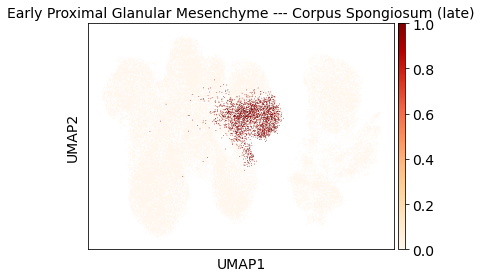

In [84]:
sc.pl.umap(human, color = ['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'], color_map = 'OrRd')

In [85]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] = mouse.obs_names.map(df_cell_type_membership['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].to_dict())
# mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] = mouse.obs_names.map(df_cell_type_membership['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].to_dict())



In [86]:
mouse.obs['belongs_to_matched_nhoods'] = mouse.obs_names.map(combined_df['nhoods_counts'].to_dict())
mouse.obs['belongs_to_n_celltypes'] = mouse.obs_names.map(df_cell_type_membership['celltype_counts'].to_dict())
mouse.obs['belongs_to_0_matched_nhoods'] = [1 if i == 0 else 0 for i in mouse.obs['belongs_to_matched_nhoods']]


In [87]:
color_dict = {
     'Epithelium' : 'burlywood', 'Distal Dorsal Glanular Mesenchyme' : 'navy', 
    'Ventral Glanular Mesenchyme' : 'blue', 
    'Early Proximal Glanular Mesenchyme' : 'deepskyblue', 'Late Proximal Glanular Mesenchyme' : 'dodgerblue', 
    'Sub-Dermal Prepuce' : 'blueviolet', 'Preputial Mesenchyme' : 'violet', 'Corpus Cavernsoum' : 'green'
}

In [88]:
## Eliminate small clusters of doublets 
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False,)

In [89]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [90]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] = mouse.obs_names.isin(nhoods_mouse_filtered.index.to_list()).astype(int)

In [91]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].value_counts()

0    58723
1     2109
Name: Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late), dtype: int64

In [92]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] = mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].astype(str)

In [87]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (early)'] = mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (early)'].astype(str)
mouse.obs['Preputial Mesenchyme --- Corpus Spongiosum'] = mouse.obs['Preputial Mesenchyme --- Corpus Spongiosum'].astype(str)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



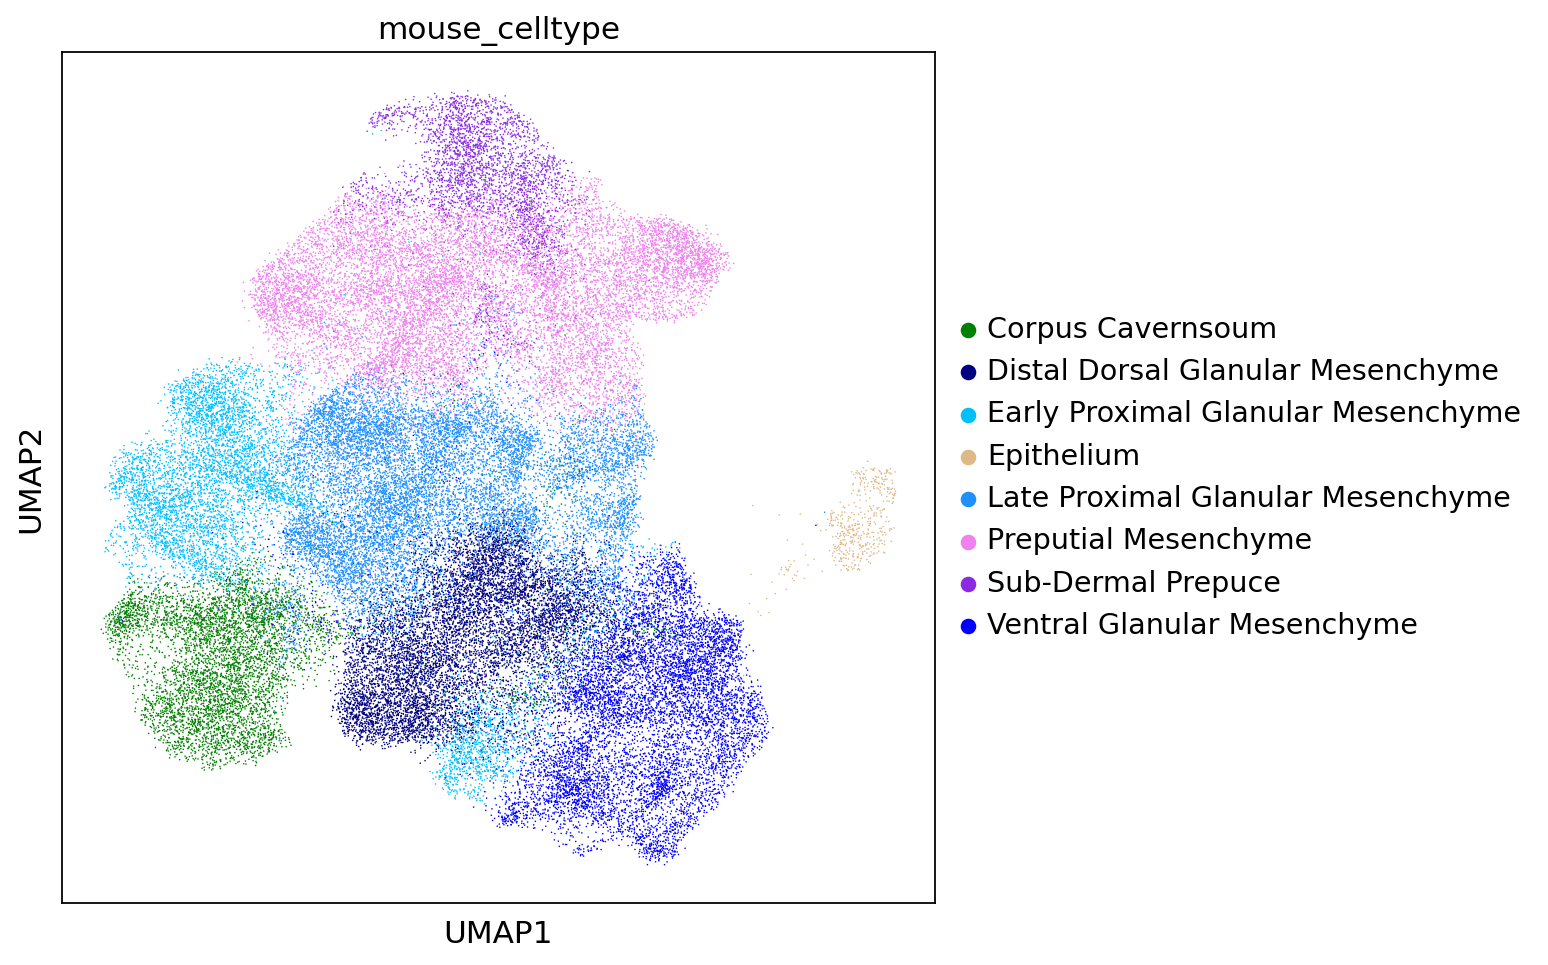

In [109]:
sc.pl.umap(mouse, color = ['mouse_celltype',
                          ], palette = color_dict, save = '_mouse_orthologs.pdf')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



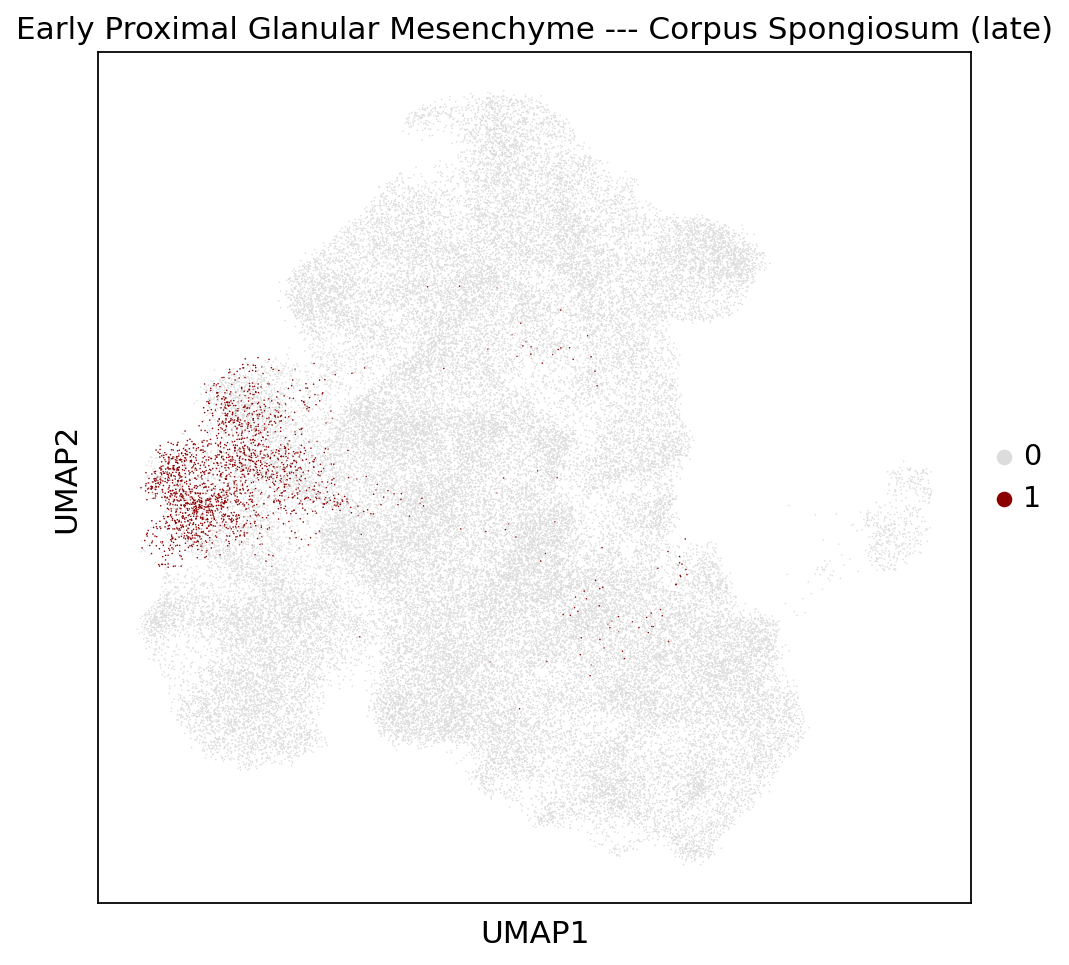

In [93]:
sc.pl.umap(mouse, color = ['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)',
                          ], palette = {'0' : 'gainsboro', '1' : 'darkred'} , save = '_mouse_cslate.pdf')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



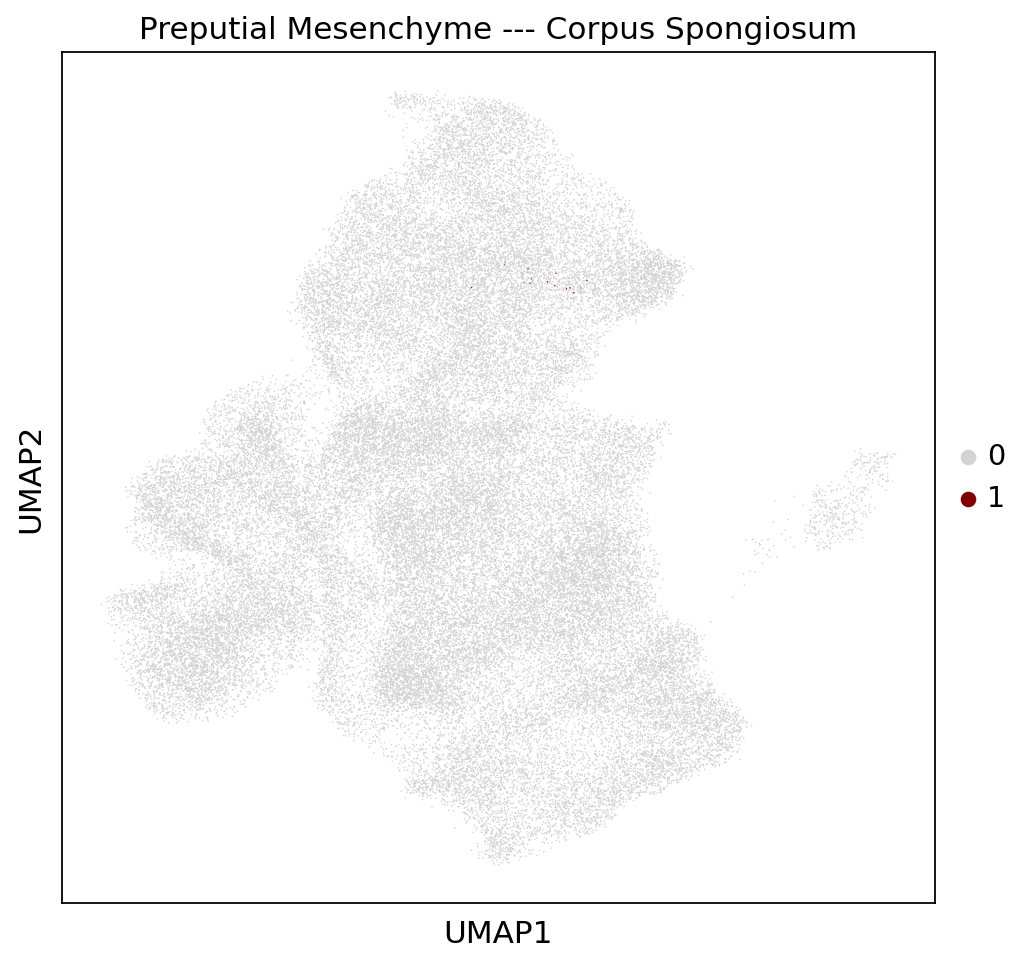

In [90]:
sc.pl.umap(mouse, color = ['Preputial Mesenchyme --- Corpus Spongiosum',
                          ], palette = {'0' : 'lightgrey', '1' : 'maroon'} , save = '_mouse_csearly_prep.pdf')

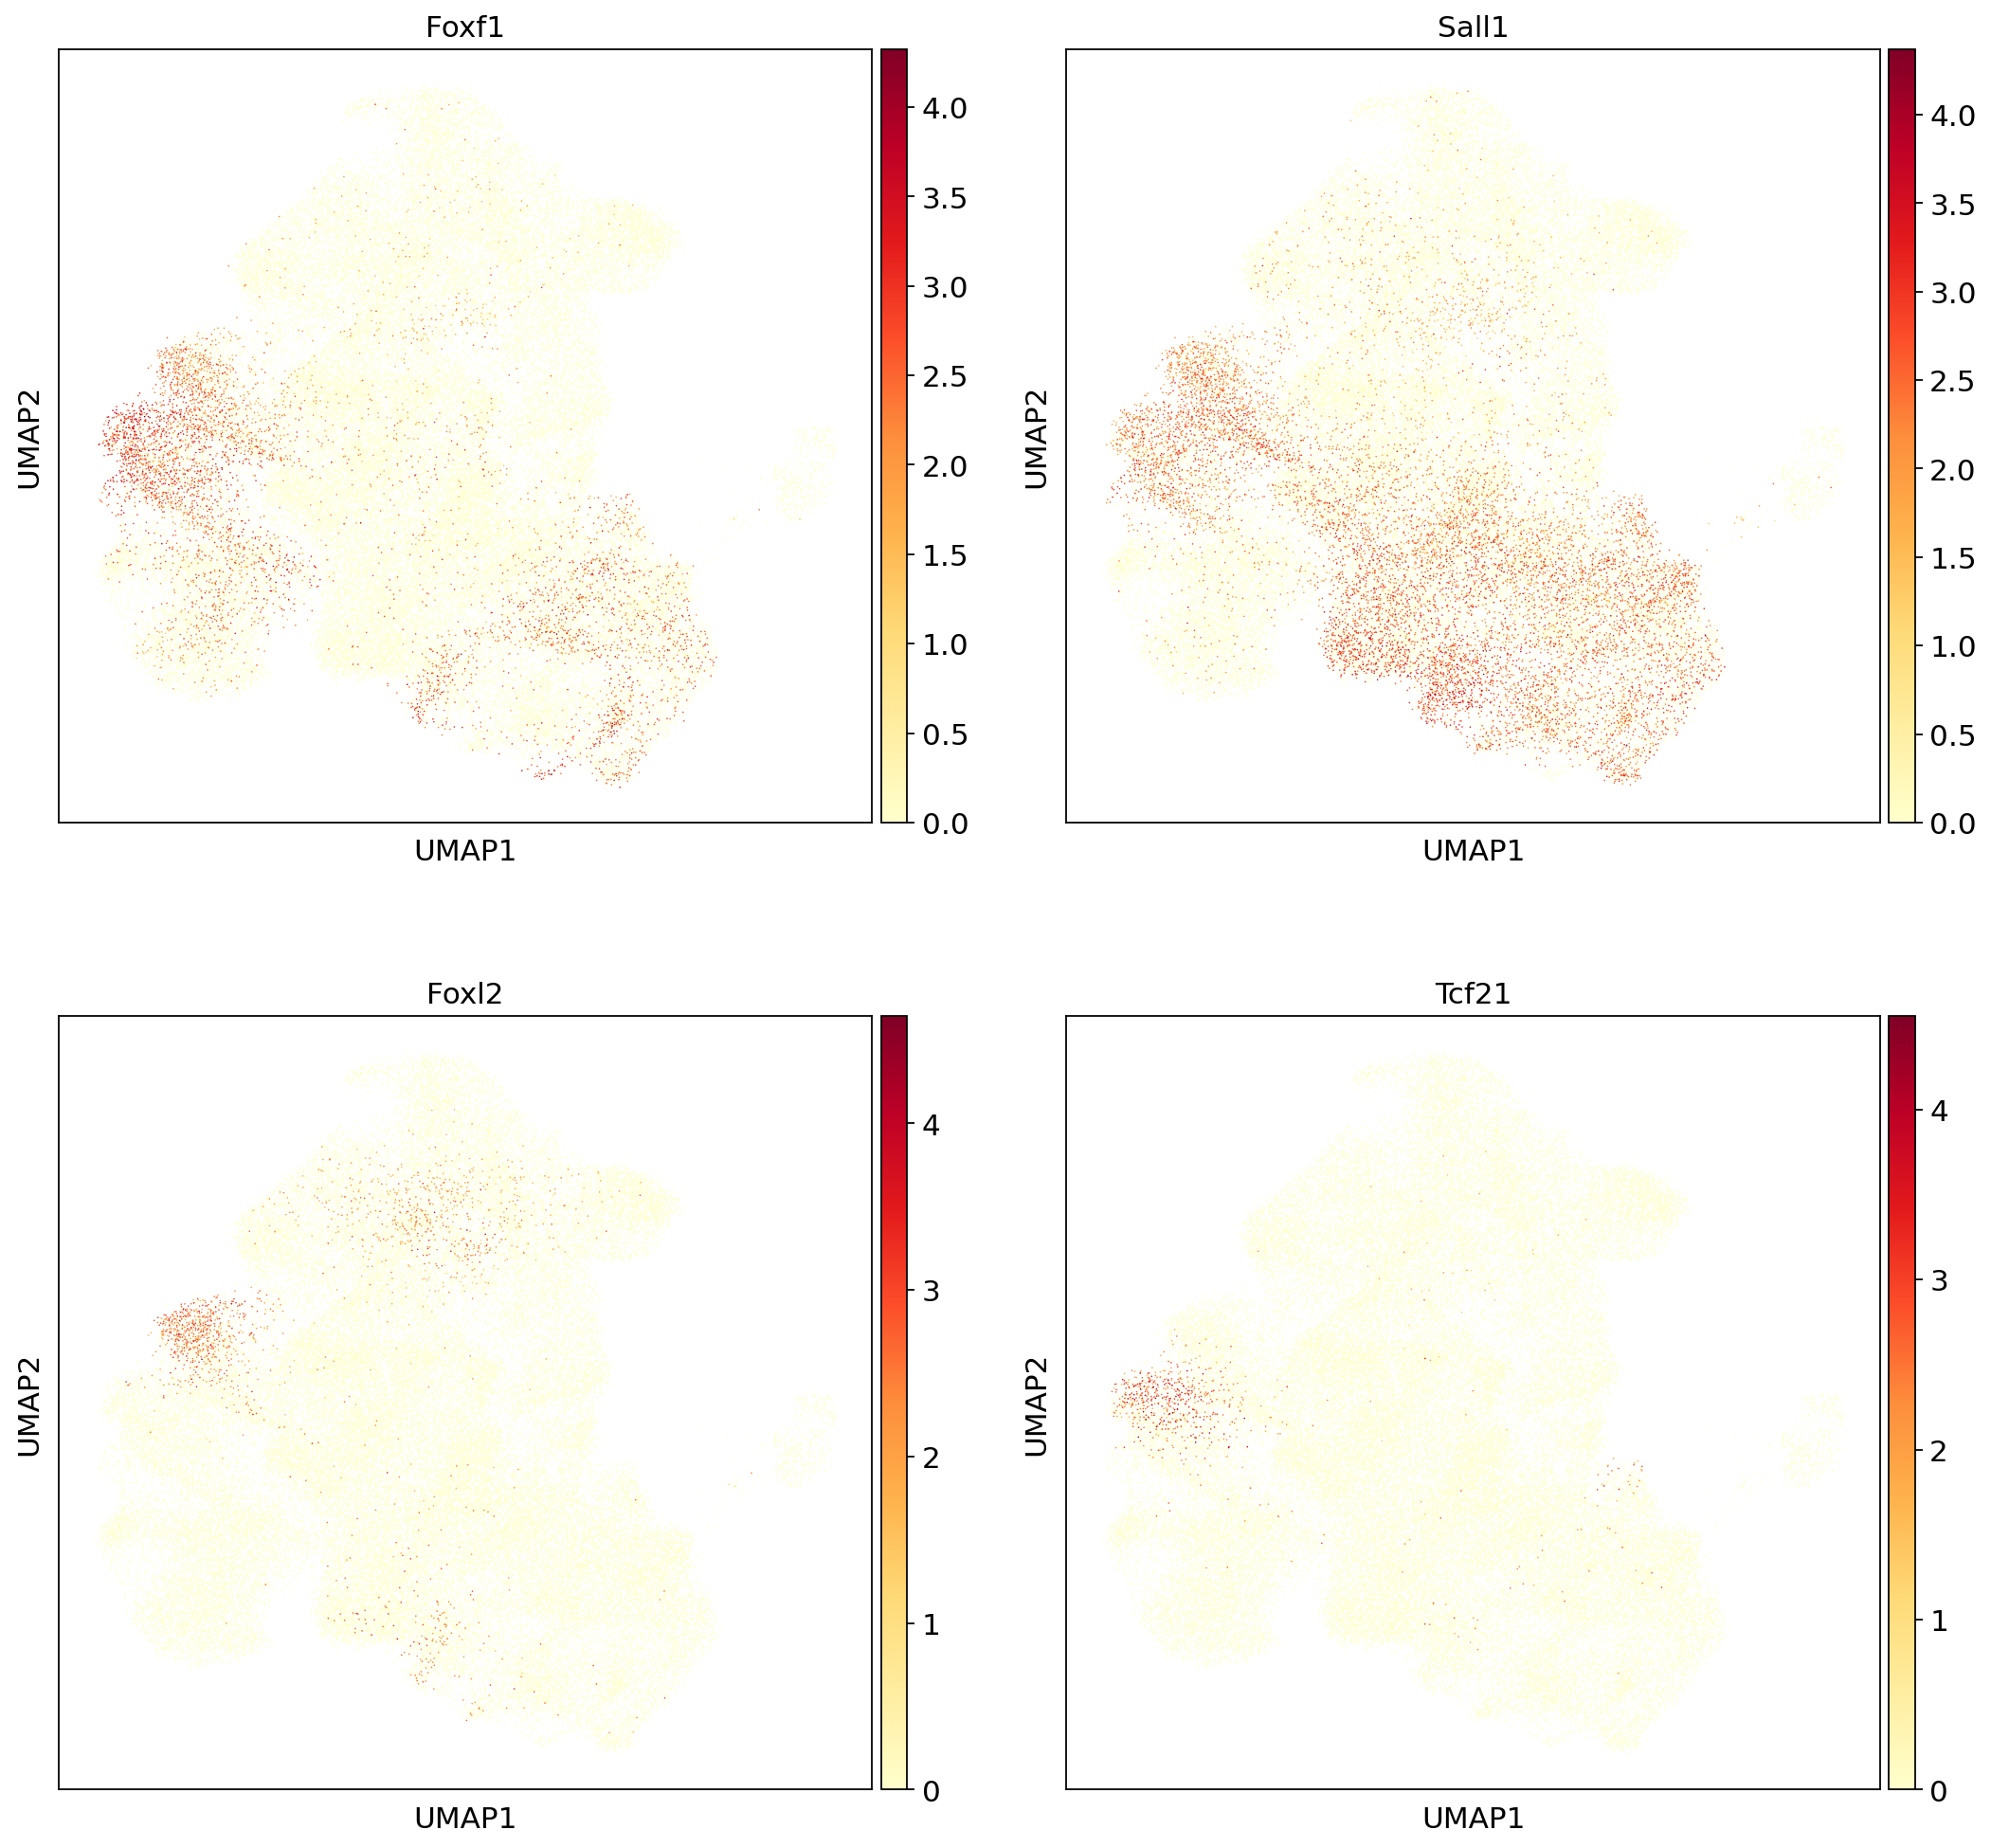

In [102]:
sc.pl.umap(mouse, color = ['Foxf1','Sall1', 'Foxl2' , 'Tcf21', 
                          ], color_map = 'YlOrRd', use_raw = False, ncols = 2, save = '_mouse_markers.pdf')

In [264]:
mouse

AnnData object with n_obs × n_vars = 60832 × 2530
    obs: 'n_genes', 'sample', 'donor', 'age', 'sex', 'genotype', 'percent_mito', 'n_counts', 'batch', 'celltype', 'S_score', 'G2M_score', 'phase', 'leiden', 'harmonised_celltype', 'leiden_R', 'mouse_celltype', 'species', 'Early Proximal Glanular Mesenchyme --- Corpus Spongiosum', 'Preputial Mesenchyme --- Corpus Spongiosum', 'belongs_to_matched_nhoods', 'belongs_to_n_celltypes', 'belongs_to_0_matched_nhoods'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'fe

In [94]:
mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'].value_counts()

0    58723
1     2109
Name: Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late), dtype: int64

## Differential expression between males and females in corpus spongiosum

In [95]:
mouse.obs['matched_celltype'] = np.where(mouse.obs['Early Proximal Glanular Mesenchyme --- Corpus Spongiosum (late)'] == '1',
                                        'Corpus Spongiosum late', mouse.obs['celltype'])

In [96]:
mouse.obs['matched_celltype'].value_counts(dropna = False)

Distal Dorsal Glanular Mesenchyme     9630
Late Proximal Glanular Mesenchyme     8433
Early Ventral Glanular Mesenchyme     7849
Early Preputial Mesenchyme            7393
Late Preputial Mesenchyme             6657
Corpus Cavernsoum                     6528
Early Proximal Glanular Mesenchyme    6204
Sub-Dermal Prepuce                    3334
Late Ventral Glanular Mesenchyme      2158
Corpus Spongiosum late                2109
Epithelium                             537
Name: matched_celltype, dtype: int64

In [97]:
# Load original object with full transcriptome and transfer matched cell type annotations 
mouse_full = sc.read('/nfs/team292/vl6/Mouse_RepTract/Amato2021/Amato2021_mese_epi_annotated.h5ad')
mouse_full

AnnData object with n_obs × n_vars = 60832 × 19312
    obs: 'n_genes', 'sample', 'donor', 'age', 'sex', 'genotype', 'percent_mito', 'n_counts', 'batch', 'celltype', 'S_score', 'G2M_score', 'phase', 'leiden', 'harmonised_celltype', 'leiden_R'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'donor_colors', 'harmonised_celltype_colors', 'leiden', 'leiden_R_colors', 'leiden_colors

In [98]:
mouse_full.obs['matched_celltype'] = mouse_full.obs_names.map(mouse.obs['matched_celltype'].to_dict())

In [99]:
import anndata

In [100]:
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [101]:
%%R
library(SingleCellExperiment)
library(biomaRt)
library(data.table)
library(scater)
library(BiocParallel)

In [102]:
mpw_raw = anndata.AnnData(X = mouse_full.raw.X, var = mouse_full.raw.var, obs = mouse_full.obs)
mpw_raw.shape

(60832, 19312)

In [103]:
# remove mito genes
non_mito_genes = [name for name in mpw_raw.var_names if not name.startswith('mt-')]
mpw_raw = mpw_raw[:, non_mito_genes]

# remove ribo genes
non_ribo_genes = [name for name in mpw_raw.var_names if not name.startswith('Rp')]
mpw_raw = mpw_raw[:, non_ribo_genes]

# remove heat shock protein genes
non_hps_genes = [name for name in mpw_raw.var_names if not name.startswith('Hsp')]
mpw_raw = mpw_raw[:, non_hps_genes]
sc.pp.filter_genes(mpw_raw, min_counts = 10)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



In [104]:
mpw_raw.shape

(60832, 19132)

In [105]:
import decoupler as dc

In [121]:
%%R -o results
library(biomaRt)
# Connect to the Ensembl database, selecting the Mus musculus dataset
mart <- useMart(biomart = "ensembl", dataset = "mmusculus_gene_ensembl")

# Retrieve data for genes on the Y chromosome with the generic gene name attribute
results <- getBM(attributes = c("chromosome_name", "external_gene_name"),
                 filters = "chromosome_name", values = "Y", mart = mart, verbose = TRUE)

# Display the first few rows of the results
#head(results)


Error in bmRequest(request = request, verbose = verbose) : 
  Not Found (HTTP 404).


In [106]:
ychrom = pd.read_csv('mouse_y_chrom_biomart.txt', sep = '\t')
ychrom.head()

Gene stable ID Gene stable ID version Gene name
0  ENSMUSG00000100384   ENSMUSG00000100384.2   Gm28489
1  ENSMUSG00000100216   ENSMUSG00000100216.2   Gm21867
2  ENSMUSG00000099641   ENSMUSG00000099641.2   Gm29448
3  ENSMUSG00000095634   ENSMUSG00000095634.3   Gm20816
4  ENSMUSG00000101393   ENSMUSG00000101393.2   Gm29447

In [107]:
ychrom = ychrom['Gene name'].to_list()
ychrom = list(np.unique(ychrom))
len(ychrom)

1568

In [108]:
mpw_raw.var['Y_chrom'] = ['Y' if gene in ychrom else 'notY' for gene in mpw_raw.var_names]

In [109]:
mpw_raw.var['Y_chrom'].value_counts(dropna = False)

notY    19128
Y           4
Name: Y_chrom, dtype: int64

In [110]:
ychrom_pres = mpw_raw.var[mpw_raw.var['Y_chrom'] == 'Y'].index.to_list()

In [111]:
keep = [i for i in mpw_raw.var_names.to_list() if i not in ychrom_pres]

In [112]:
len(keep)

19128

In [113]:
mpw_raw = mpw_raw[:, keep]

In [114]:
mouse_full = mouse_full[:, keep]

In [115]:
mouse_full.shape

(60832, 19128)

In [116]:
mouse_full.layers["counts"] = mpw_raw.X.copy()

In [117]:
mouse_full.layers["counts"].toarray()[20:30, 20:30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 2.],
       [0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [118]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    mouse_full,
    sample_col='donor',
    groups_col='matched_celltype',
    layer='counts',
    mode='sum',
    min_cells=0,
    min_counts=0
)

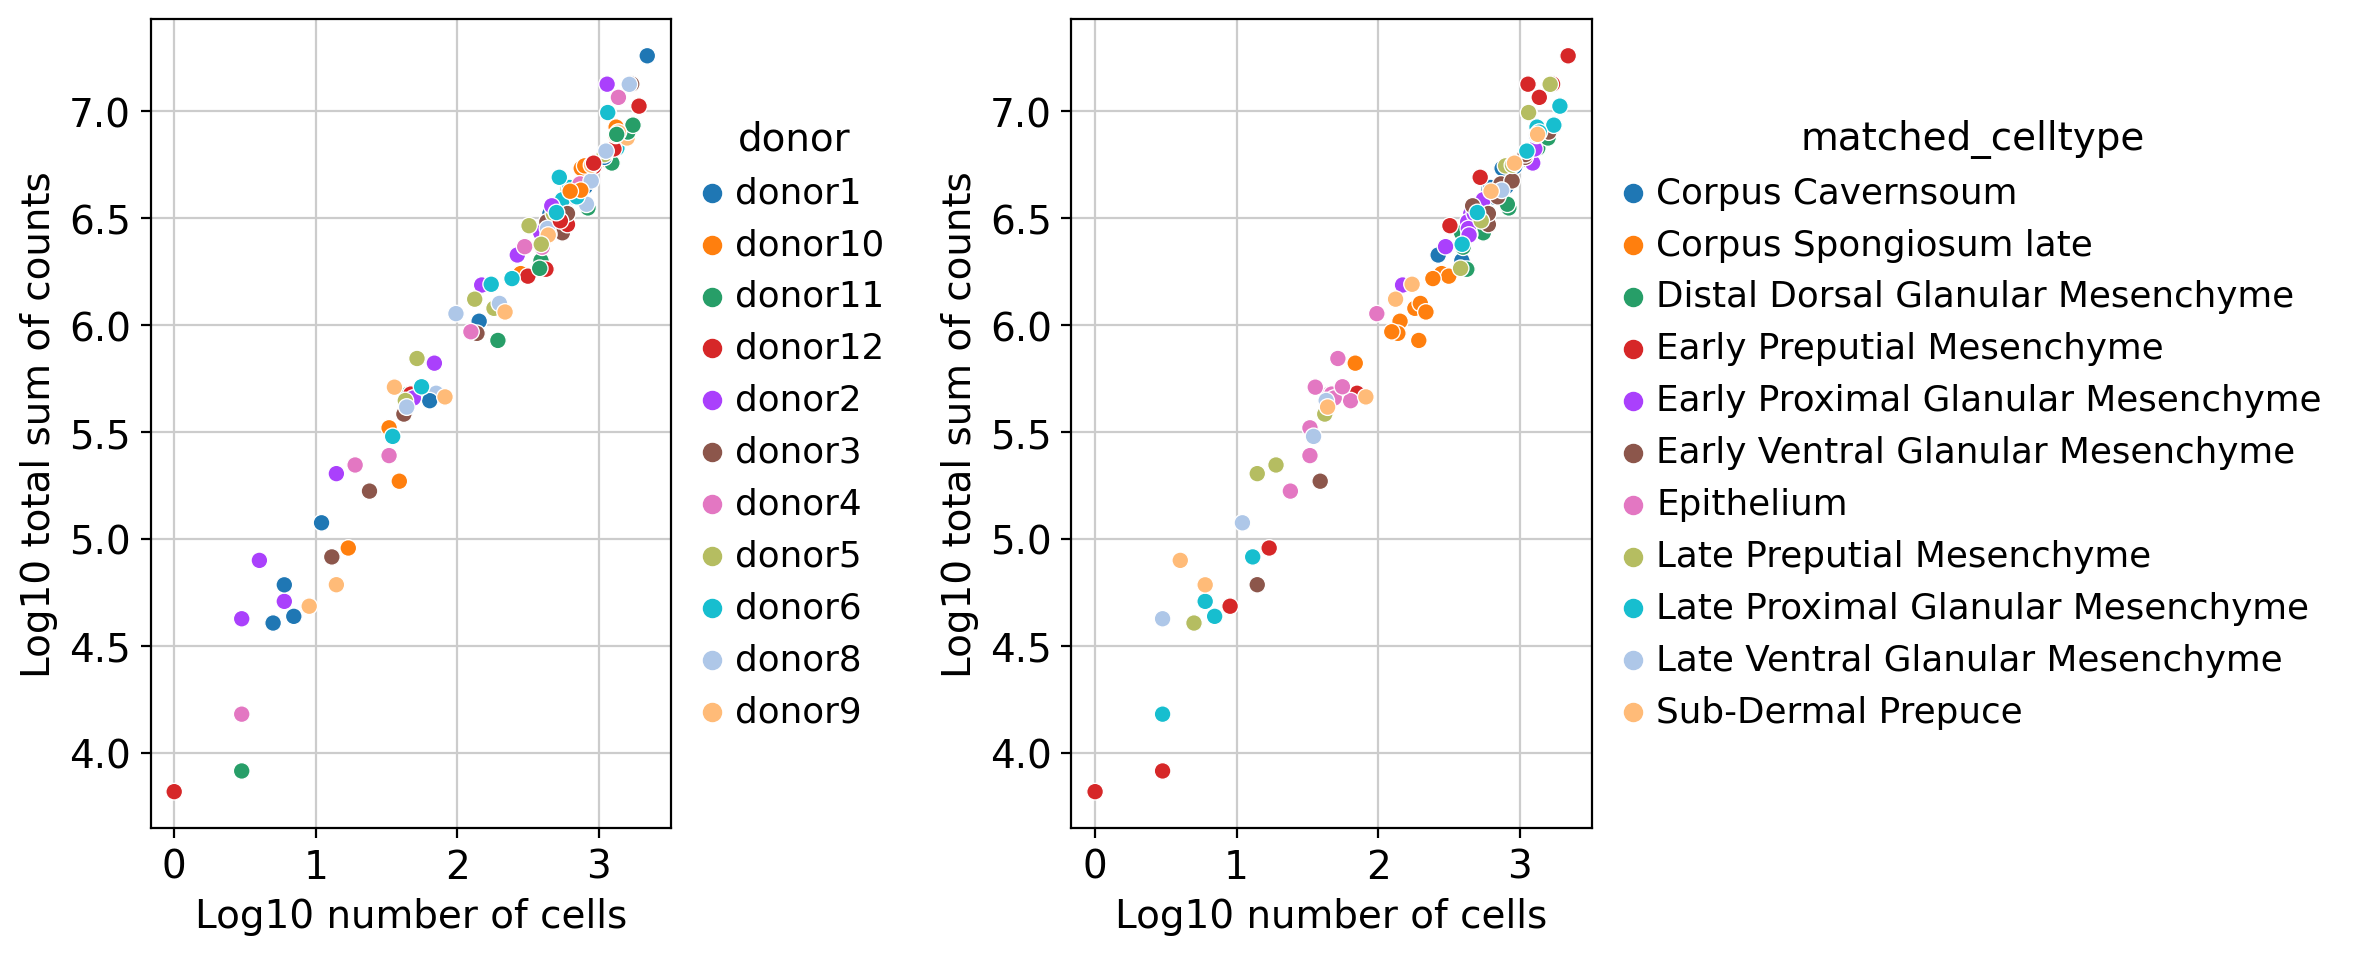

In [119]:
dc.plot_psbulk_samples(pdata, groupby=['donor', 'matched_celltype'], figsize=(12, 5))

In [120]:
# Get filtered pseudo-bulk profile
pdata = dc.get_pseudobulk(
    mouse_full,
    sample_col='donor',
    groups_col='matched_celltype',
    layer='counts',
    mode='sum',
    min_cells=10,
    min_counts=1000
)
pdata

AnnData object with n_obs × n_vars = 104 × 19128
    obs: 'sample', 'donor', 'age', 'sex', 'genotype', 'batch', 'phase', 'matched_celltype', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    layers: 'psbulk_props'

In [121]:
# Store raw counts in layers
pdata.layers['counts'] = pdata.X.copy()

# Normalize, scale and compute pca
sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)
sc.pp.scale(pdata, max_value=10)
sc.tl.pca(pdata)

# Return raw counts to X
dc.swap_layer(pdata, 'counts', X_layer_key=None, inplace=True)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



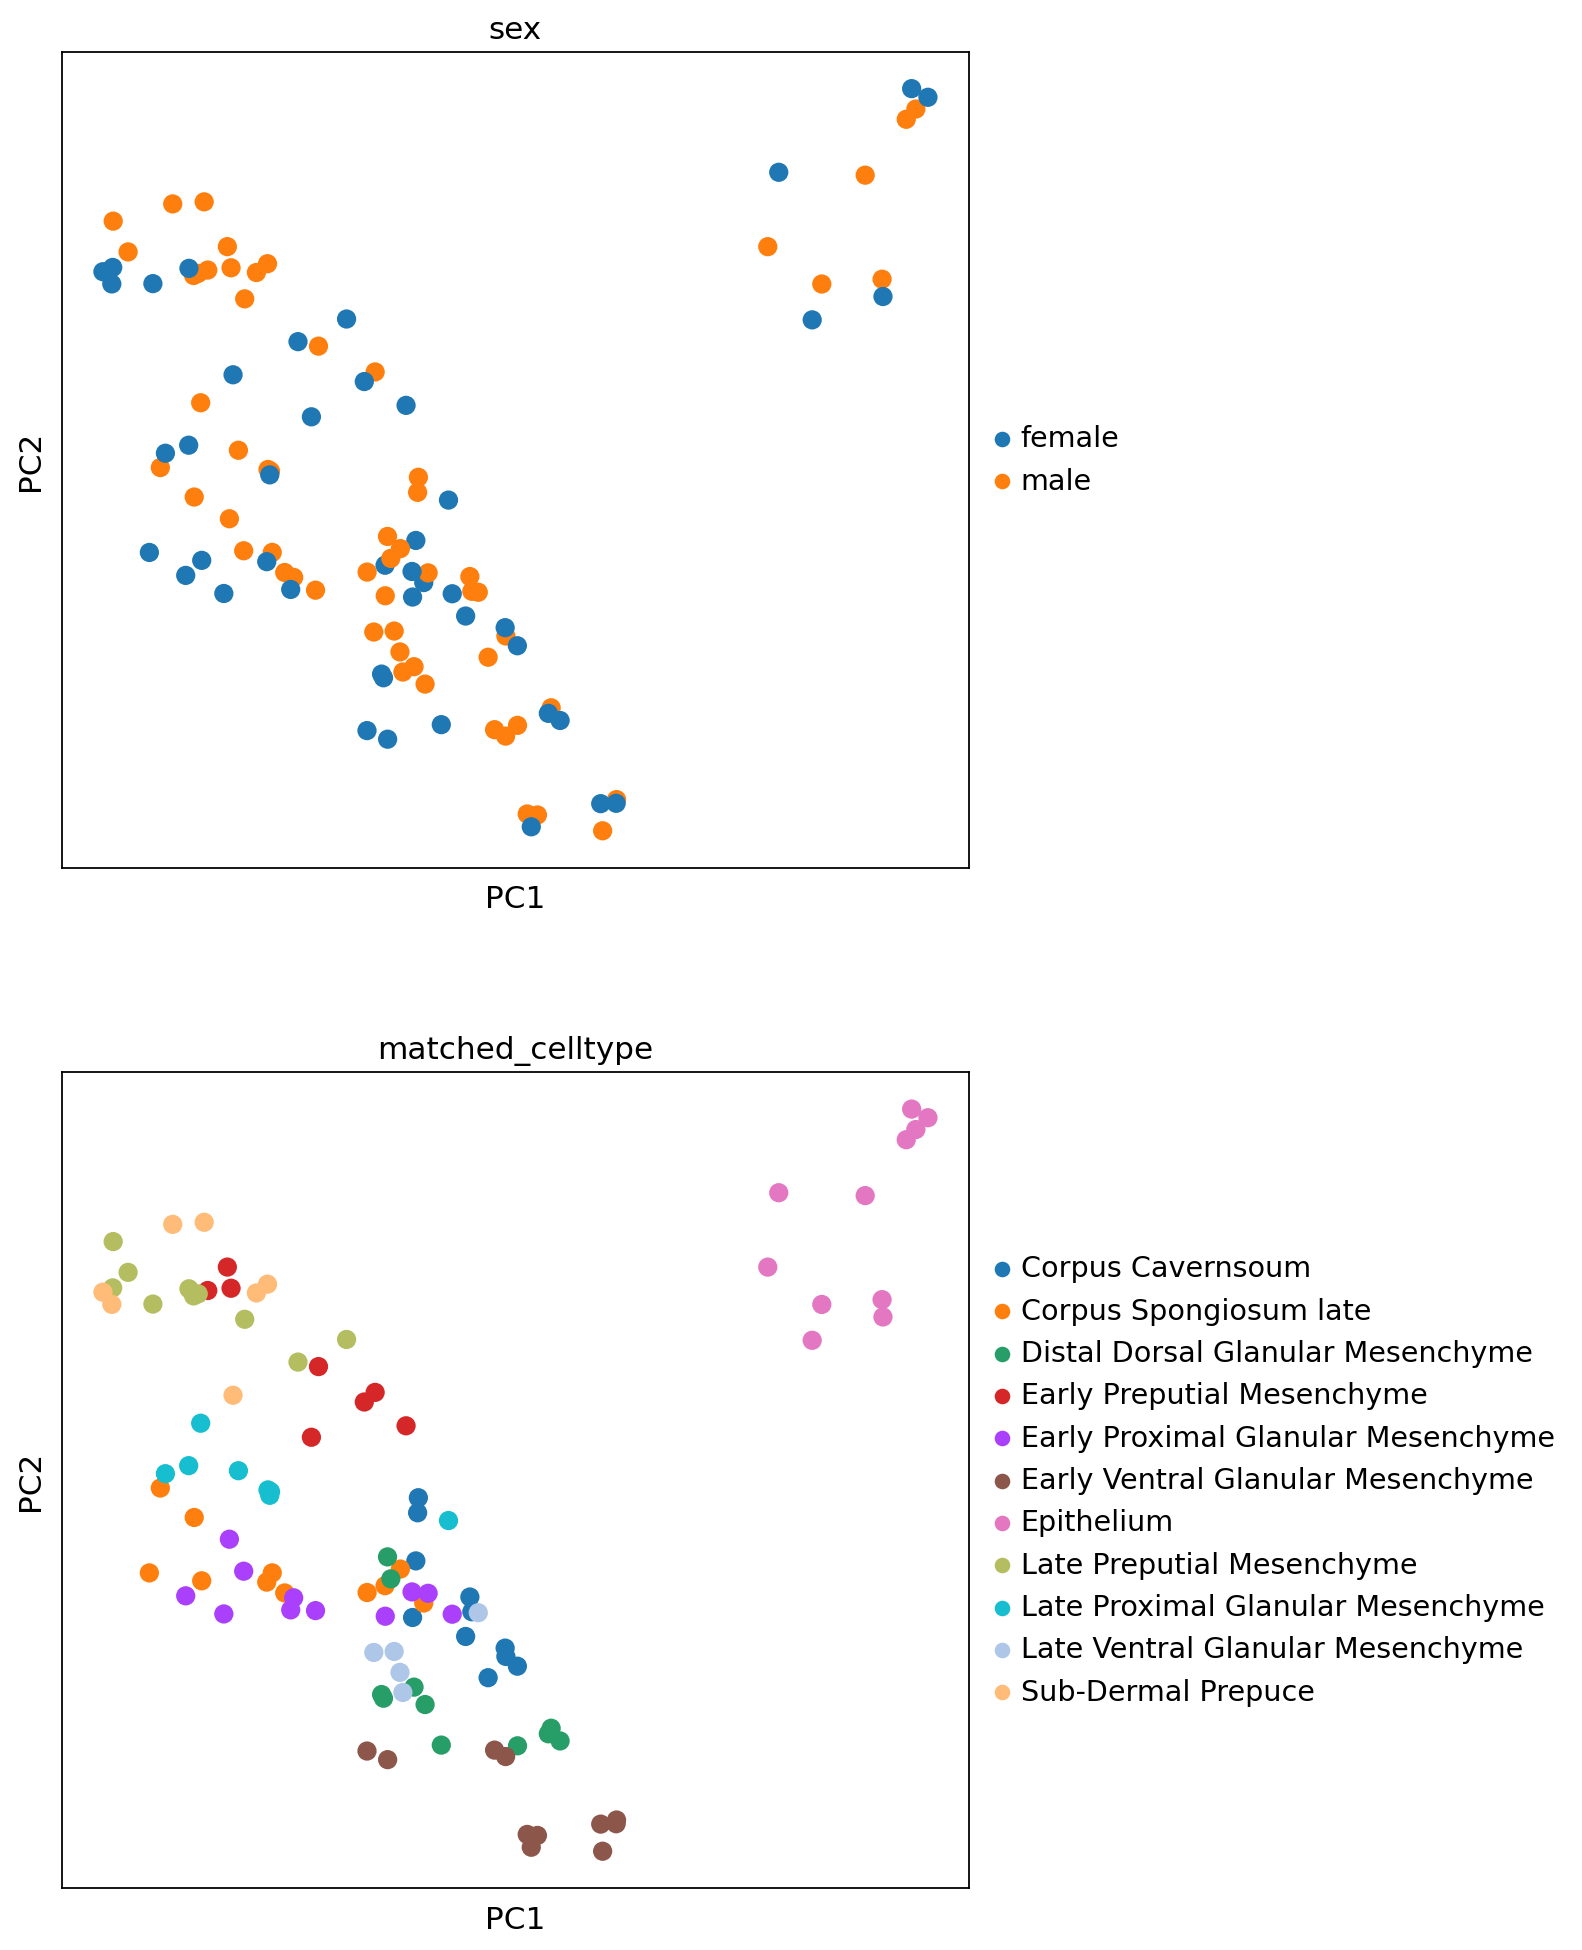

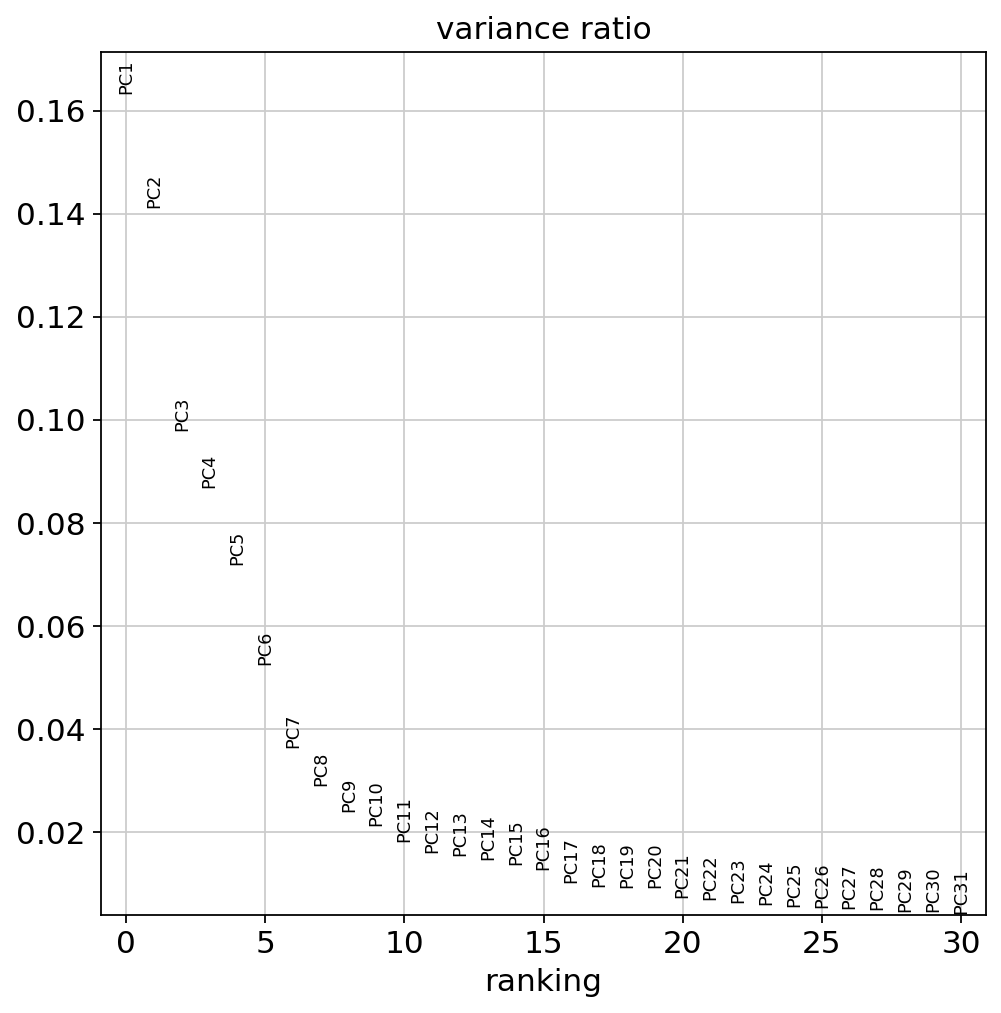

In [122]:
sc.pl.pca(pdata, color=['sex', 'matched_celltype'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

In [123]:
dc.get_metadata_associations(
    pdata,
    obs_keys = ['sex', 'matched_celltype', 'psbulk_n_cells', 'psbulk_counts'],  # Metadata columns to associate to PCs
    obsm_key='X_pca',  # Where the PCs are stored
    uns_key='pca_anova',  # Where the results are stored
    inplace=True,
)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/matplotlib/lines.py:1206: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



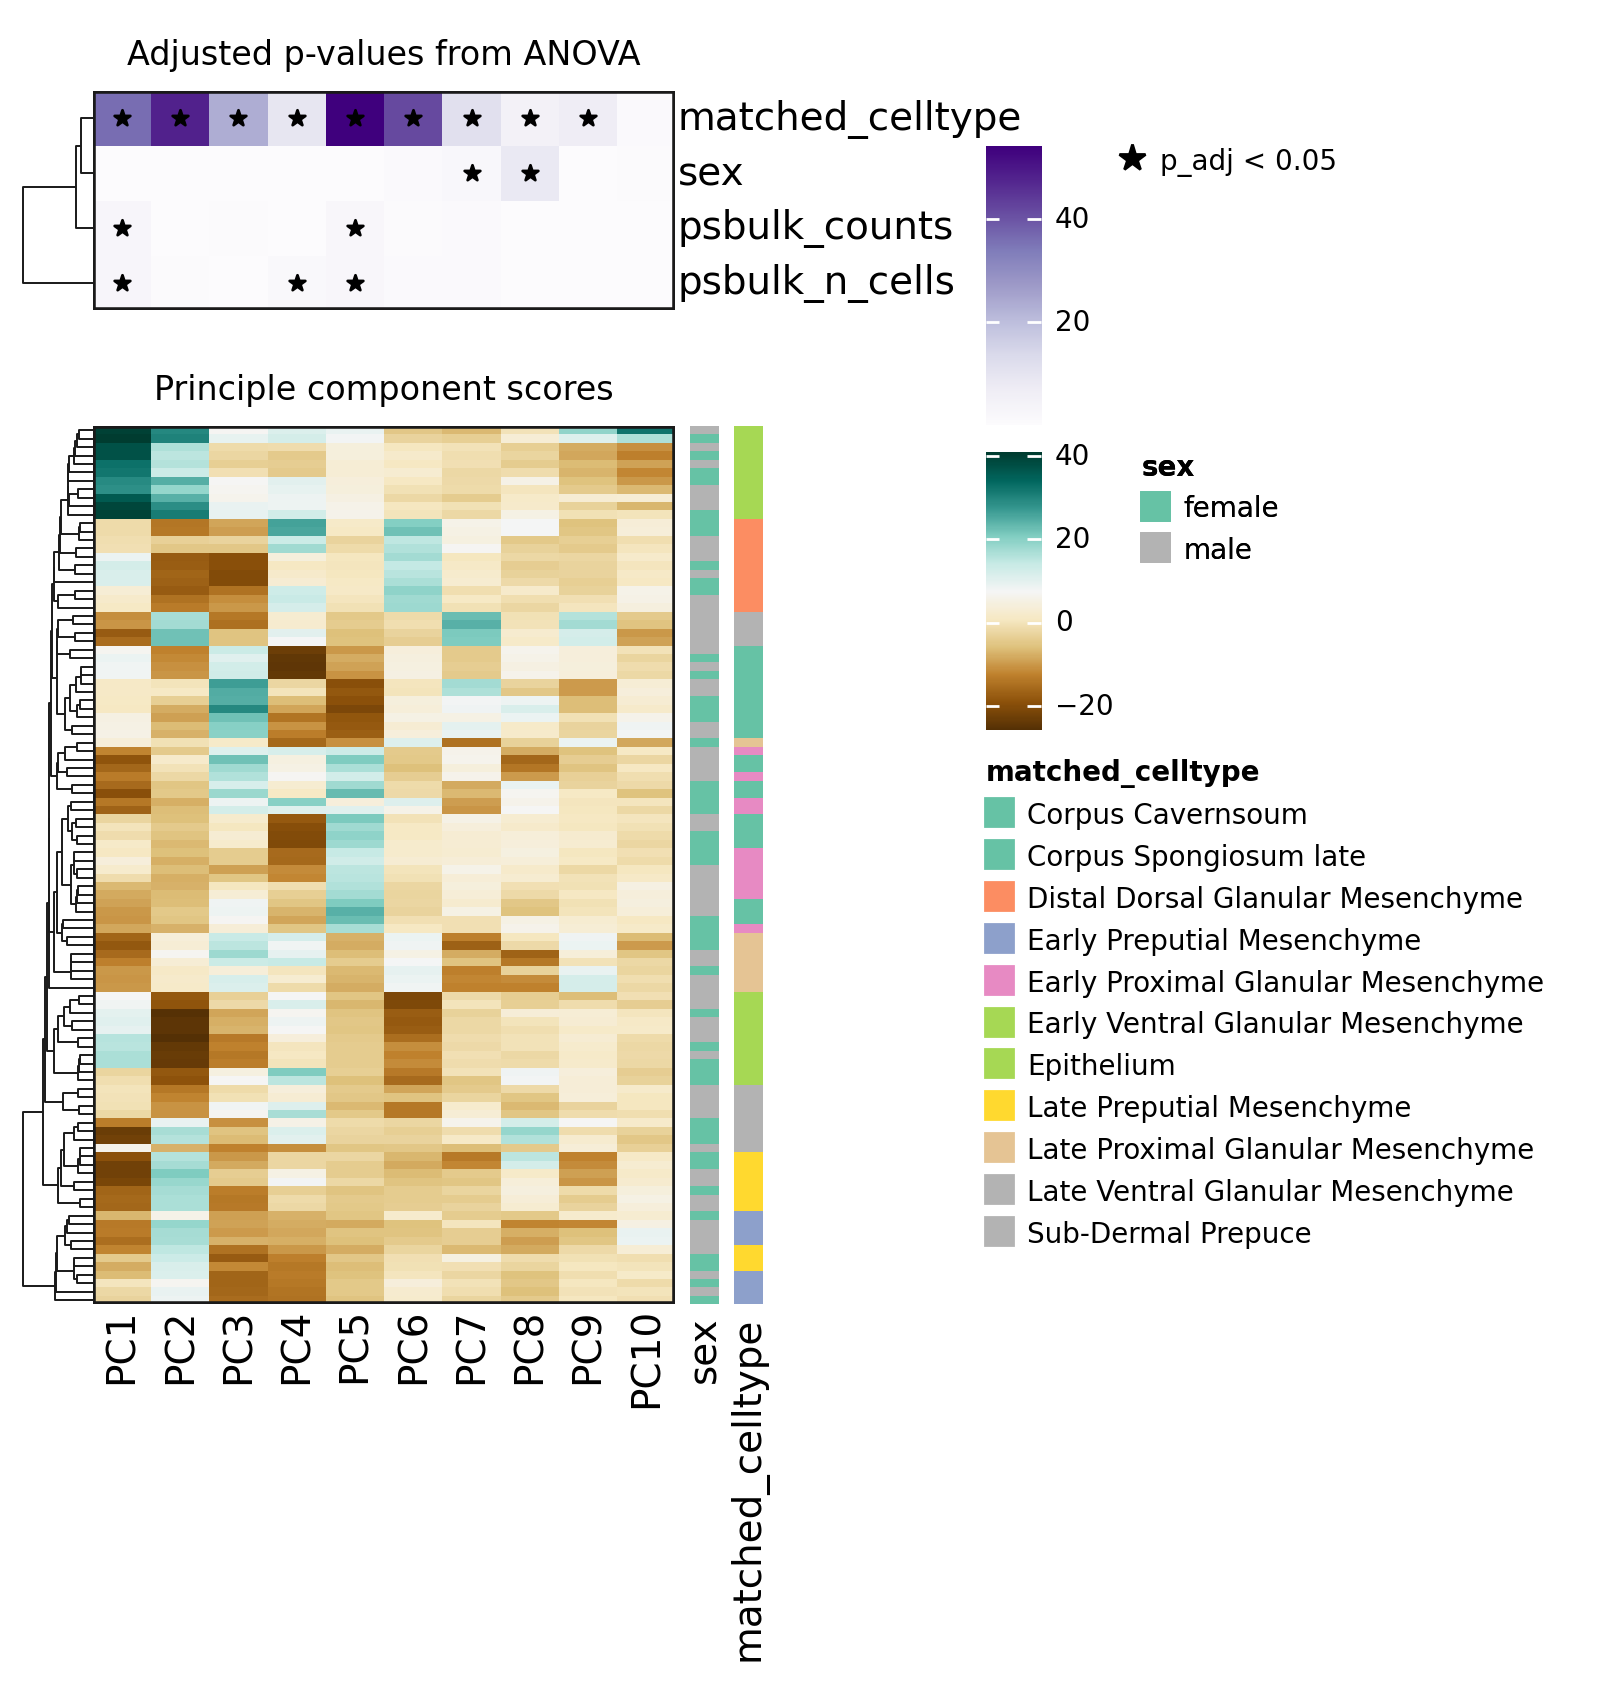

In [124]:
dc.plot_associations(
    pdata,
    uns_key='pca_anova',  # Summary statistics from the anova tests
    obsm_key='X_pca',  # where the PCs are stored
    stat_col='p_adj',  # Which summary statistic to plot
    obs_annotation_cols = ['sex', 'matched_celltype'], # which sample annotations to plot
    titles=['Principle component scores', 'Adjusted p-values from ANOVA'],
    figsize=(7, 7),
    n_factors=10,
)

In [125]:
# Select CorpusSpongiosum
cs = pdata[pdata.obs['matched_celltype'] == 'Corpus Spongiosum late'].copy()

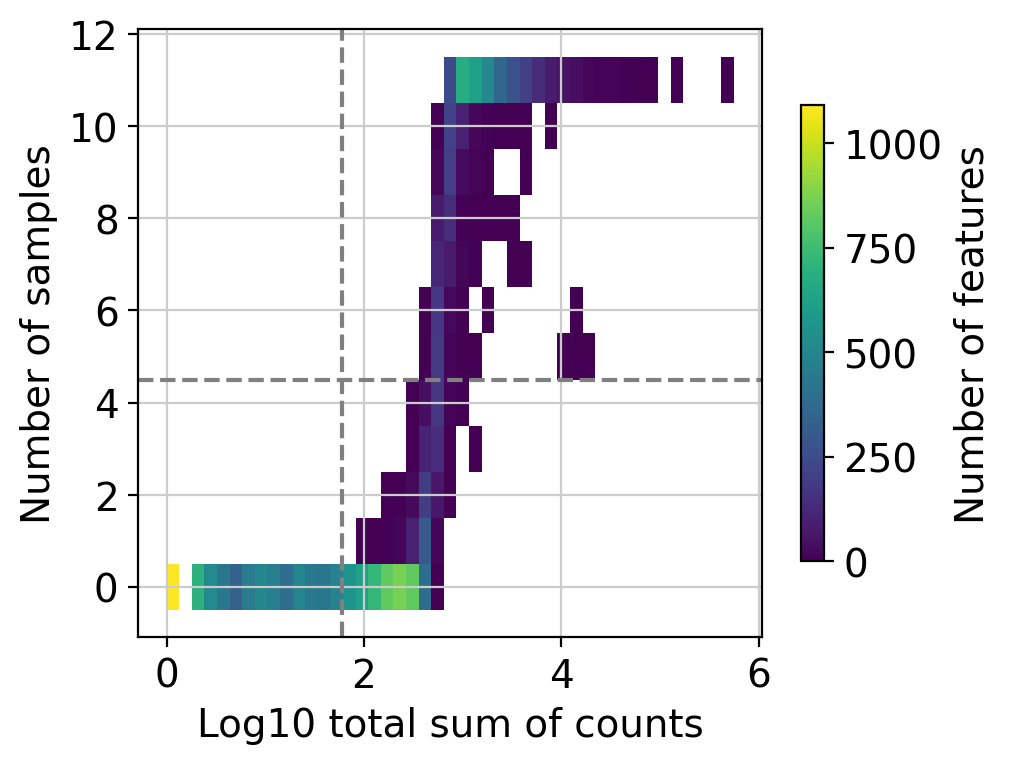

In [126]:
dc.plot_filter_by_expr(cs, group='sex', min_count=50, min_total_count=60)

In [127]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(cs, group='sex', min_count=50, min_total_count=15)

# Filter by these genes
cs = cs[:, genes].copy()
cs

AnnData object with n_obs × n_vars = 11 × 4728
    obs: 'sample', 'donor', 'age', 'sex', 'genotype', 'batch', 'phase', 'matched_celltype', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'pca', 'sex_colors', 'matched_celltype_colors', 'pca_anova'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props', 'counts'

In [128]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [129]:
# Build DESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    adata=cs,
    design_factors='sex',
    ref_level=['sex', 'female'],
    refit_cooks=True,
    inference=inference,
)

In [130]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 3.69 seconds.

Fitting dispersion trend curve...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 3.80 seconds.

Fitting LFCs...
... done in 0.39 seconds.

Refitting 0 outliers.



In [131]:
# Extract contrast between males vs females
stat_res = DeseqStats(
    dds,
    contrast=["sex", 'male', 'female'],
    inference=inference,
)

In [132]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: sex male vs female
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
2310039H08Rik   75.710182       -0.146174  0.151947 -0.962004  0.336047   
2410015M20Rik  305.829132       -0.035420  0.131568 -0.269213  0.787765   
2810403A07Rik   72.971489        0.003758  0.131593  0.028560  0.977216   
AC092855.1      58.720669       -0.072478  0.114164 -0.634856  0.525522   
AC114920.2     108.892632        0.427668  0.190488  2.245118  0.024761   
...                   ...             ...       ...       ...       ...   
Zzz3            82.562988       -0.203664  0.203595 -1.000339  0.317146   
a              106.853371       -0.082844  0.322909 -0.256555  0.797522   
hexb            59.633438       -0.361137  0.305953 -1.180366  0.237855   
l7Rn6           99.950935        0.061258  0.166804  0.367247  0.713435   
tdTomato       105.574974       -0.123219  0.325880 -0.378113  0.705347   

                   padj  
2310039H08Rik  0

... done in 0.26 seconds.



In [133]:
# Extract results
results_df = stat_res.results_df
results_df

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
2310039H08Rik   75.710182       -0.146174  0.151947 -0.962004  0.336047   
2410015M20Rik  305.829132       -0.035420  0.131568 -0.269213  0.787765   
2810403A07Rik   72.971489        0.003758  0.131593  0.028560  0.977216   
AC092855.1      58.720669       -0.072478  0.114164 -0.634856  0.525522   
AC114920.2     108.892632        0.427668  0.190488  2.245118  0.024761   
...                   ...             ...       ...       ...       ...   
Zzz3            82.562988       -0.203664  0.203595 -1.000339  0.317146   
a              106.853371       -0.082844  0.322909 -0.256555  0.797522   
hexb            59.633438       -0.361137  0.305953 -1.180366  0.237855   
l7Rn6           99.950935        0.061258  0.166804  0.367247  0.713435   
tdTomato       105.574974       -0.123219  0.325880 -0.378113  0.705347   

                   padj  
2310039H08Rik  0.863063  
2410015M20Rik  0.982310  
2810403A07Rik  0.997010  
AC092855.1     0.935509  
AC114920.2     0.344752  
...                 ...  
Zzz3           0.861154  
a              0.982310  
hexb           0.812556  
l7Rn6          0.976924  
tdTomato       0.976674  

[4728 rows x 6 columns]

In [134]:
results_df.loc['Mafb']

baseMean          348.462006
log2FoldChange      2.186938
lfcSE               0.451497
stat                4.843755
pvalue              0.000001
padj                0.000502
Name: Mafb, dtype: float64

In [135]:
results_df.loc['Csrp2']

baseMean          220.678085
log2FoldChange      0.711130
lfcSE               0.218208
stat                3.258958
pvalue              0.001118
padj                0.064475
Name: Csrp2, dtype: float64

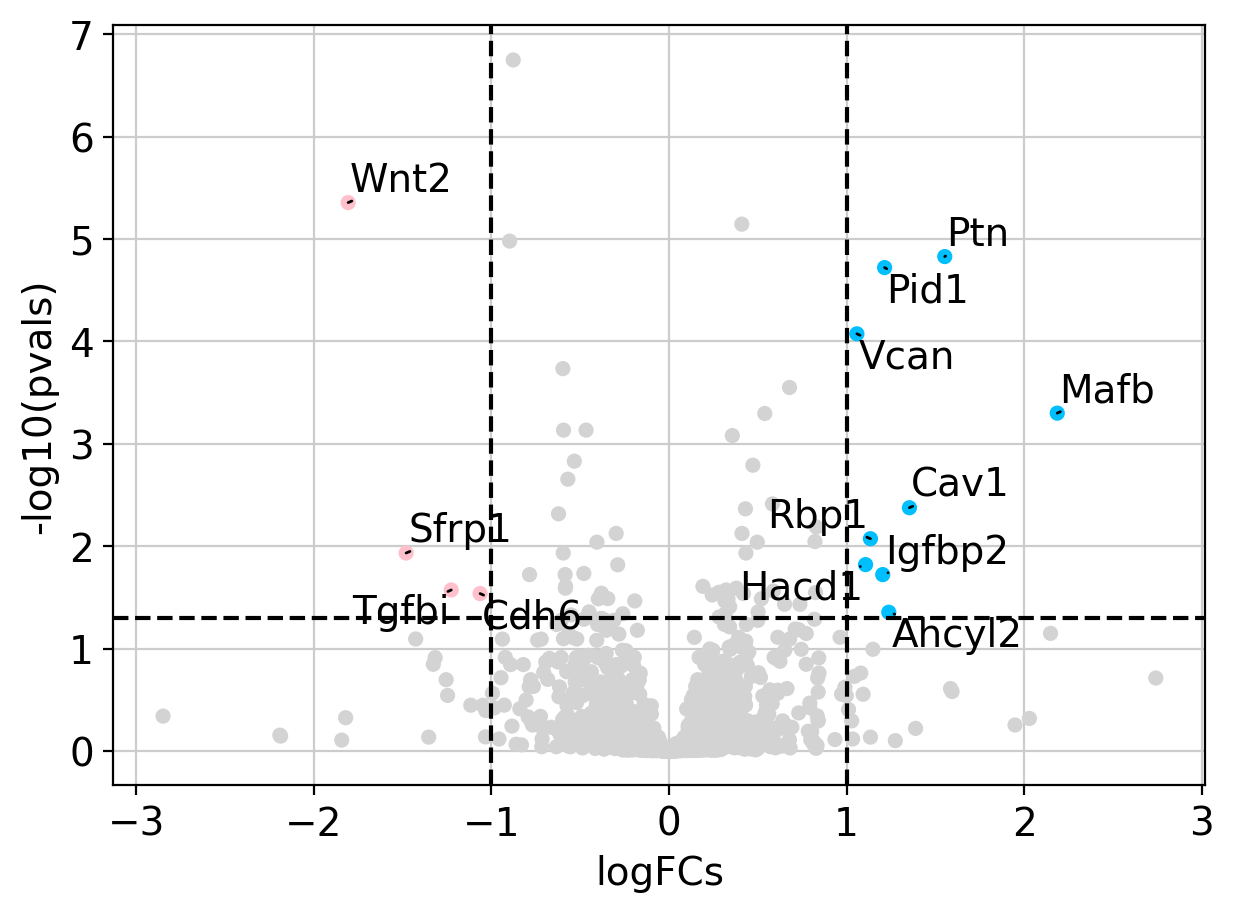

In [137]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    lFCs_thr = 1,
    sign_thr = 0.05,
    top = 50,
    color_pos = 'deepskyblue',
    color_neg = 'pink',
    color_null='lightgray',
    lFCs_limit = 5,
    figsize=(7, 5), 
    save = '_mouse_corpusspongiosum_late_revisions_DE.pdf'
)

In [311]:
results_df = results_df[(results_df['log2FoldChange'] > 1.25) | (results_df['log2FoldChange'] < -1.25)]
results_df = results_df[results_df['padj'] < 0.05]

In [312]:
pd.set_option('display.max_rows', 200)

In [313]:
results_df.sort_values('log2FoldChange')

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
Xist   1086.909912      -13.177640  1.153246 -11.426563  3.080629e-30   
Tsix     70.028419       -9.696864  1.388102  -6.985699  2.834422e-12   
Wnt2     61.041885       -1.873639  0.537675  -3.484706  4.926784e-04   
Csrp2   206.637497        1.264811  0.302761   4.177592  2.946119e-05   
Ptn    1328.598999        1.323770  0.208621   6.345345  2.219278e-10   
Nebl     53.711308        1.425018  0.370109   3.850263  1.179909e-04   
Mmp11   182.557663        1.466502  0.419560   3.495329  4.734771e-04   
Map1b   369.269897        2.301405  0.506367   4.544931  5.495318e-06   
Mafb    522.257446        2.648650  0.532581   4.973239  6.584337e-07   

               padj  
Xist   1.304338e-26  
Tsix   6.000471e-09  
Wnt2   4.345834e-02  
Csrp2  5.423420e-03  
Ptn    3.132141e-07  
Nebl   1.640200e-02  
Mmp11  4.265324e-02  
Map1b  1.454199e-03  
Mafb   3.982583e-04

In [314]:
results_df.to_csv('/nfs/team292/vl6/Mouse_RepTract/Amato2021/corpusspongiosum_allDEGs.csv')